# Análisis Exploratorio de los datos (EDA)

In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [44]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'

Los datos a utilizar corresponden a un dataset que contiene mediciones realizadas en distintas estaciones, para la variable PM10, y otras variables de interes meteorologico. 

In [45]:
# Lectura de los datos
import os
os.chdir("C:\\Users\\kaes1\\Documents\\Series de tiempo")
pm10 = pd.read_csv("data_2017_2022.csv", sep=";")
pm10.head()

,fecha,estacion,variable,tipo,medicion
0,2017-01-01T00:59:59Z,base_aerea,pm25,val,NaN
1,2017-01-01T00:59:59Z,base_aerea,so2,val,NaN
2,2017-01-01T00:59:59Z,base_aerea,lluvia,val,NaN
3,2017-01-01T00:59:59Z,base_aerea,o3,val,NaN
4,2017-01-01T00:59:59Z,base_aerea,temperatura,val,NaN


El dataset cuenta con 5 variables:
* **fecha**: esta en formato Timestamp, e indica la fecha y hora en la que fue realiza la medicion de la variable.
* **estacion**: indica la estación en la que fue realizada la medición de la variable.
* **variable**: indica la variable a la cual se realizó medicióm.
* **tipo**: se desconoce a que hace referencia
* **medición**: valor númerico registrado de la variable de interes en una fecha especifica. 


In [46]:
pm10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4084061 entries, 0 to 4084060
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   fecha     object
 1   estacion  object
 2   variable  object
 3   tipo      object
 4   medicion  object
dtypes: object(5)
memory usage: 155.8+ MB


Se debe hacer un ajuste al tipo de datos para ciertas variables, principalmente la varible medición que debe ser *númerica*, y la variable fecha, que debe ser de tipo *datetime*

* **Tranformación del tipo de dato**

In [47]:
# convertir variable medición a númerica
pm10["medicion"]=pm10["medicion"].str.replace(",", ".").astype("float")

Antes de cambiar el tipo de dato de la variable *fecha*, se realiza una trasnformación a la tabla, de tal forma que se desagregada la columna de *variable* y se genera una nueva columna por cada una de las variables a la que se le realizó medición.

In [48]:
# tranformacion de la tabla 
# creacion de columnas para cada variable medida
pm10_pv = pm10.pivot(index=["fecha", "estacion"],columns= "variable", values="medicion").reset_index()
pm10_pv.head()

variable,fecha,estacion,black_carbon,direccion_viento,h2s,humedad,lluvia,no2,o3,pm10,pm25,presion,radiacion_solar,so2,temperatura,temperatura_10_m,uv-pm,velocidad_viento
0,2017-01-01T00:59:59Z,base_aerea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01T00:59:59Z,canaveralejo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.7,NaN,NaN,NaN,0.314265,NaN,NaN,NaN,NaN
2,2017-01-01T00:59:59Z,compartir,NaN,208.6,NaN,75.9,0.0,NaN,8.456252,221.0,161.0,680.5,0.0,NaN,25.3,NaN,NaN,1.4
3,2017-01-01T00:59:59Z,era_obrero,NaN,NaN,NaN,NaN,0.0,NaN,16.147321,195.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01T00:59:59Z,ermita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.9,NaN,NaN,NaN,2.147475,NaN,NaN,NaN,NaN


In [49]:
pm10_pv.shape

(473256, 18)

Ahora se tienen 19 variables en el dataset.

In [50]:
# Datos por hora
from datetime import datetime
pm10_pv["fecha_"]= pm10_pv["fecha"].str.slice(start=0,stop=10, step=1)
pm10_pv["fecha"]= pd.to_datetime(pm10_pv["fecha"])
pm10_pv["Year"]= pm10_pv["fecha"].dt.year
pm10_pv["Mes"]= pm10_pv["fecha"].dt.month

pm10_pv.head()

variable,fecha,estacion,black_carbon,direccion_viento,h2s,humedad,lluvia,no2,o3,pm10,...,presion,radiacion_solar,so2,temperatura,temperatura_10_m,uv-pm,velocidad_viento,fecha_,Year,Mes
0,2017-01-01 00:59:59+00:00,base_aerea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01,2017,1
1,2017-01-01 00:59:59+00:00,canaveralejo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.7,...,NaN,NaN,0.314265,NaN,NaN,NaN,NaN,2017-01-01,2017,1
2,2017-01-01 00:59:59+00:00,compartir,NaN,208.6,NaN,75.9,0.0,NaN,8.456252,221.0,...,680.5,0.0,NaN,25.3,NaN,NaN,1.4,2017-01-01,2017,1
3,2017-01-01 00:59:59+00:00,era_obrero,NaN,NaN,NaN,NaN,0.0,NaN,16.147321,195.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01,2017,1
4,2017-01-01 00:59:59+00:00,ermita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.9,...,NaN,NaN,2.147475,NaN,NaN,NaN,NaN,2017-01-01,2017,1


A continuación se realiza un descriptivo númerico de las variables en el dataset:

In [51]:
pm10_pv.describe()

variable,black_carbon,direccion_viento,h2s,humedad,lluvia,no2,o3,pm10,pm25,presion,radiacion_solar,so2,temperatura,temperatura_10_m,uv-pm,velocidad_viento,Year,Mes
count,8620.000000,204419.000000,15353.000000,230887.000000,260671.000000,1.000000,201936.000000,234568.000000,174546.000000,209181.000000,221284.000000,132180.000000,267206.000000,13746.000000,8620.000000,205405.000000,473256.000000,473256.000000
mean,4.552135,178.454751,2.154953,70.706824,0.281119,0.131641,25.261089,40.489469,16.655055,878.770948,226.741876,4.640322,25.556927,23.713131,2.789227,1.545669,2019.500228,6.523962
std,18.988855,100.544821,2.126202,16.125048,2.567629,NaN,28.968317,25.002037,10.931488,70.114450,294.656423,8.490598,3.849027,3.483256,1.793203,1.458267,1.707471,3.448423
min,0.026000,0.000000,0.000000,12.800000,0.000000,0.131641,-3.158832,0.000000,0.000000,27.700000,0.000000,-4.530647,8.000000,14.700000,0.019520,0.000000,2017.000000,1.000000
25%,1.298588,95.900000,0.682665,58.600000,0.000000,0.131641,5.768302,23.000000,8.920000,900.200000,0.000000,1.230870,22.500000,20.900000,1.570683,0.600000,2018.000000,4.000000
50%,1.985470,173.300000,1.490718,71.100000,0.000000,0.131641,12.949249,36.000000,14.340000,903.000000,23.000000,3.037891,25.200000,22.900000,2.412391,1.000000,2020.000000,7.000000
75%,2.960525,262.600000,2.730660,83.900000,0.000000,0.131641,34.727532,53.000000,22.360000,905.300000,488.000000,6.232914,28.200000,26.600000,3.506891,2.100000,2021.000000,10.000000
max,408.712800,360.000000,27.975338,100.700000,156.970000,0.131641,290.435961,420.000000,388.000000,913.500000,1042.910000,842.150463,40.200000,33.000000,20.767270,37.700000,2022.000000,12.000000


En el caso del *PM10*, a simple viste se logra apreciar que hay una gran cantidad de datos faltantes con respecto al total de datos en el dataset (aproximandamente el 50%). Se tiene un valor promedio de 40.49 µg/m3, y el 50% o menos de los registros tienen valor igual o inferior a 36 µg/m3, pero se alcanzan valores altos, siendo el maximo registrso de 420 µg/m3. Esto da indiciones de que distribución de la varible se ecuentra sesgada hacia la derecha.

In [52]:
pm10_pv.describe(include="object")

variable,estacion,fecha_
count,473256,473256
unique,9,2191
top,base_aerea,2017-01-01
freq,52584,216


In [53]:
pm10_pv["estacion"].unique()

array(['base_aerea', 'canaveralejo', 'compartir', 'era_obrero', 'ermita',
       'flora', 'pance', 'transitoria', 'univalle'], dtype=object)

En este caso se tienen mediciones de PM10 y demás variables para 9 estaciones meteorológicas, siendo la estación *base_aerea* la que tiene el mayor número de registros. Tambien se puede observar que se tienen registros para 2191 timestamps, siendo la de mayor número de resgitros el *01-01-2017*.

### Comportamiento y Distribución de los datos de PM10

En la siguiente figura se muestra un grafico de densidad y un grafico de cajas y bigotes para el pm10 a nivel general. 

Text(0.5, 0, ' pm10 (µg/m³)')

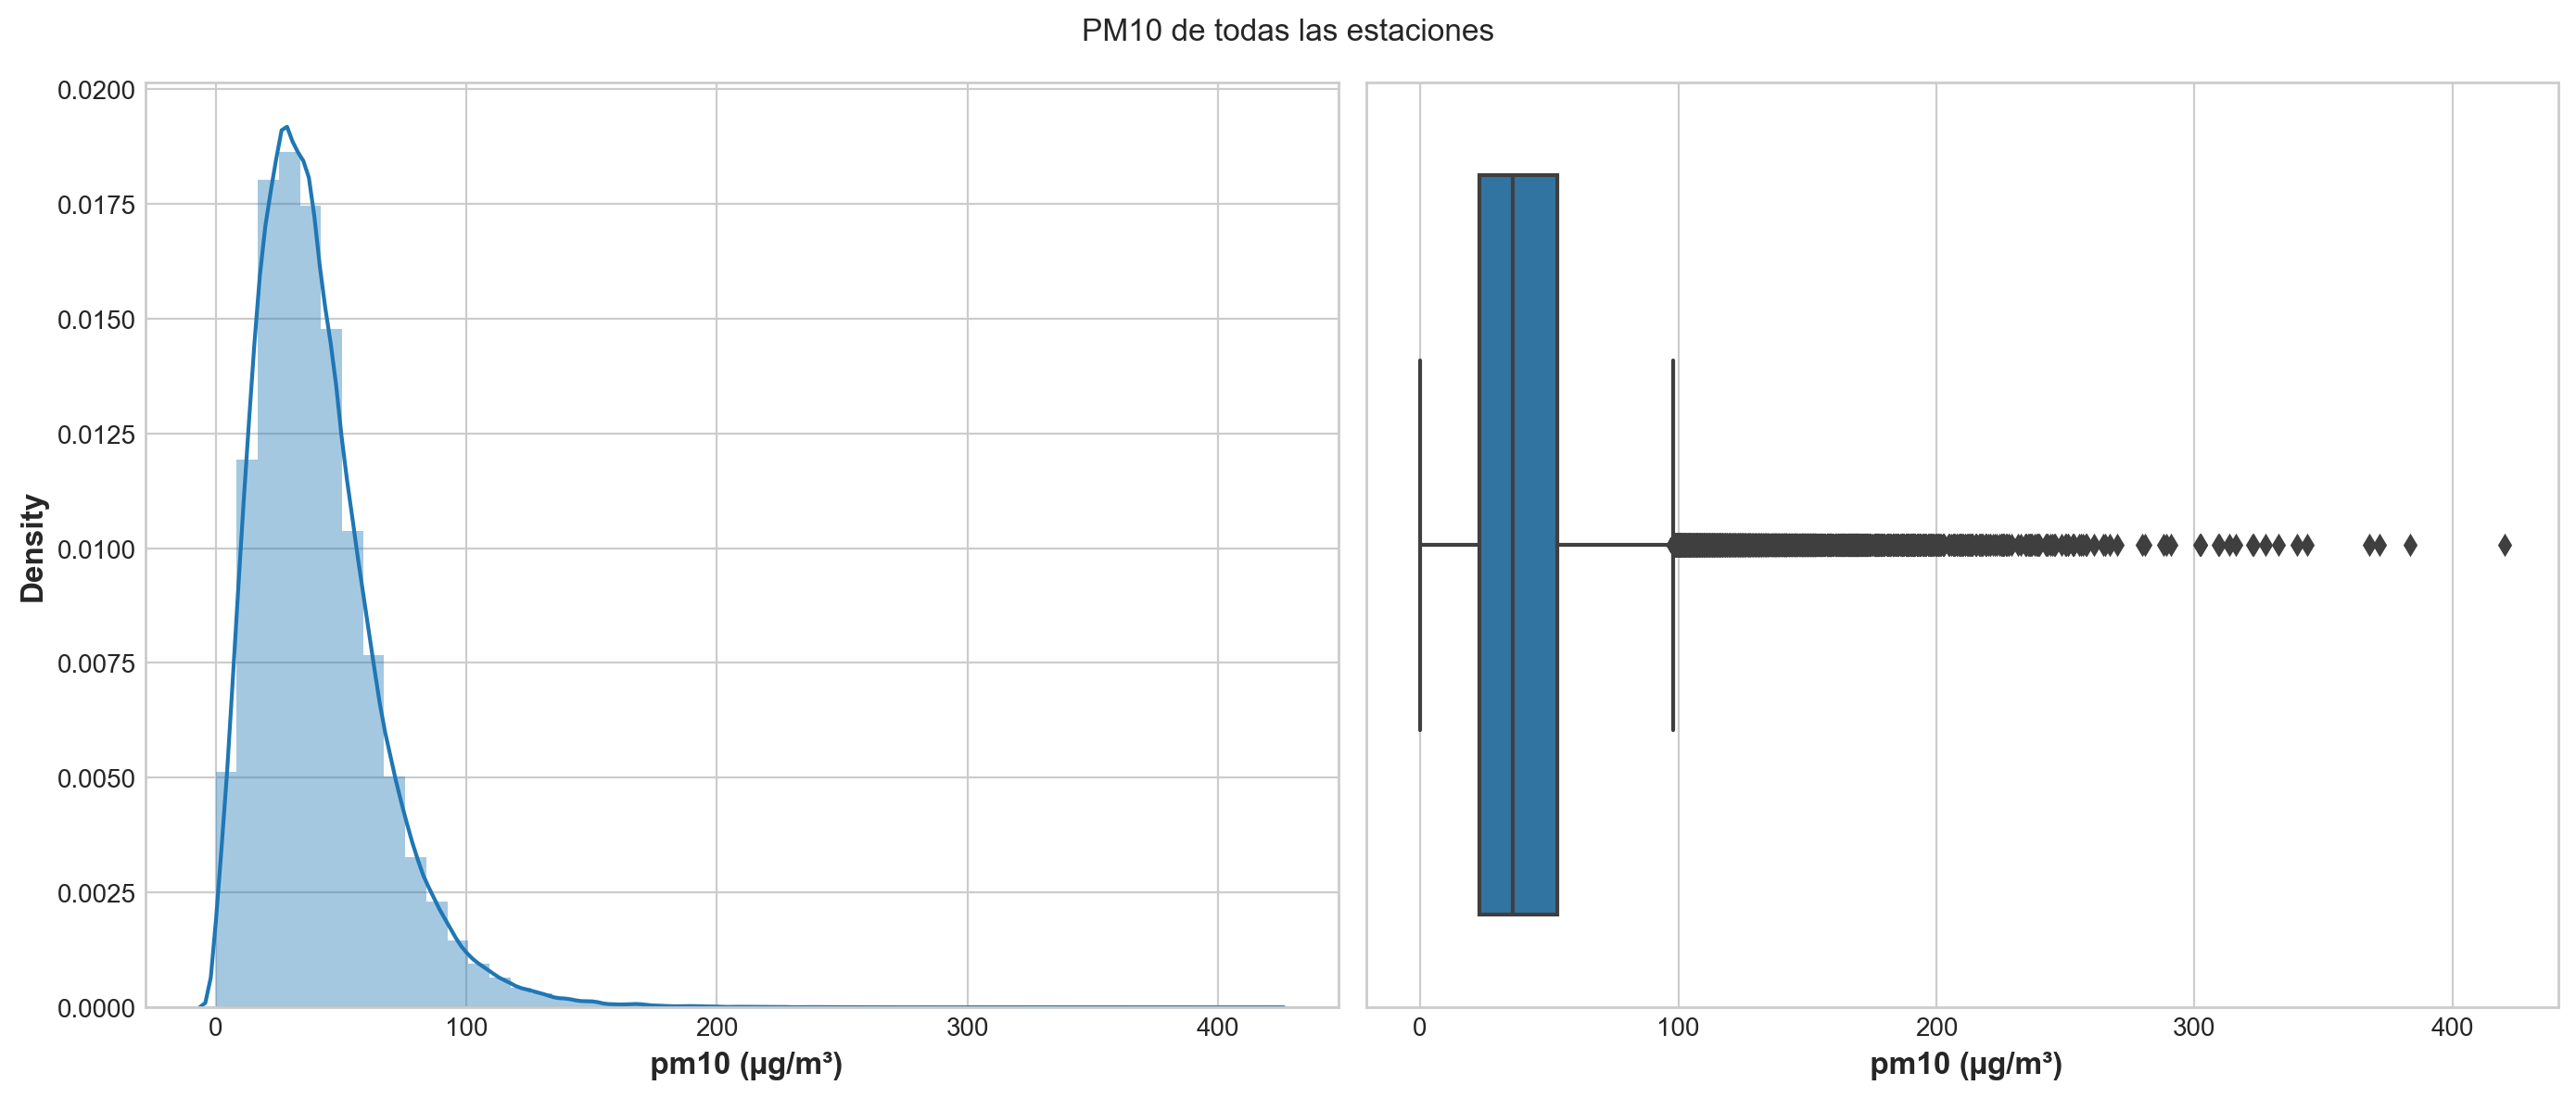

In [54]:
# Grafico de densidad y boxplot para la distribucion del pm10
plt.figure(figsize=(14, 6))
plt.suptitle('PM10 de todas las estaciones')  # Agregar título
plt.subplot(1, 2, 1) # grafico de densidad
sns.distplot(pm10_pv["pm10"], norm_hist=False)
plt.xlabel(" pm10 (µg/m³)")

plt.subplot(1, 2, 2) # boxplot
sns.boxplot(x=pm10_pv["pm10"])
plt.xlabel(" pm10 (µg/m³)")

Se confirma que la distribución del *pm10* es sesgada a la derecha, con una alta presencia de valores  que podrían considerarse atipicos. Se puede observar que alrededor de un 75% de los valores de *pm10* son valores iguales o inferiores a 50 µg/m3, alcanzando en ocasiones valores, posiblemente atipicos, superiores a los 100 µg/m3.

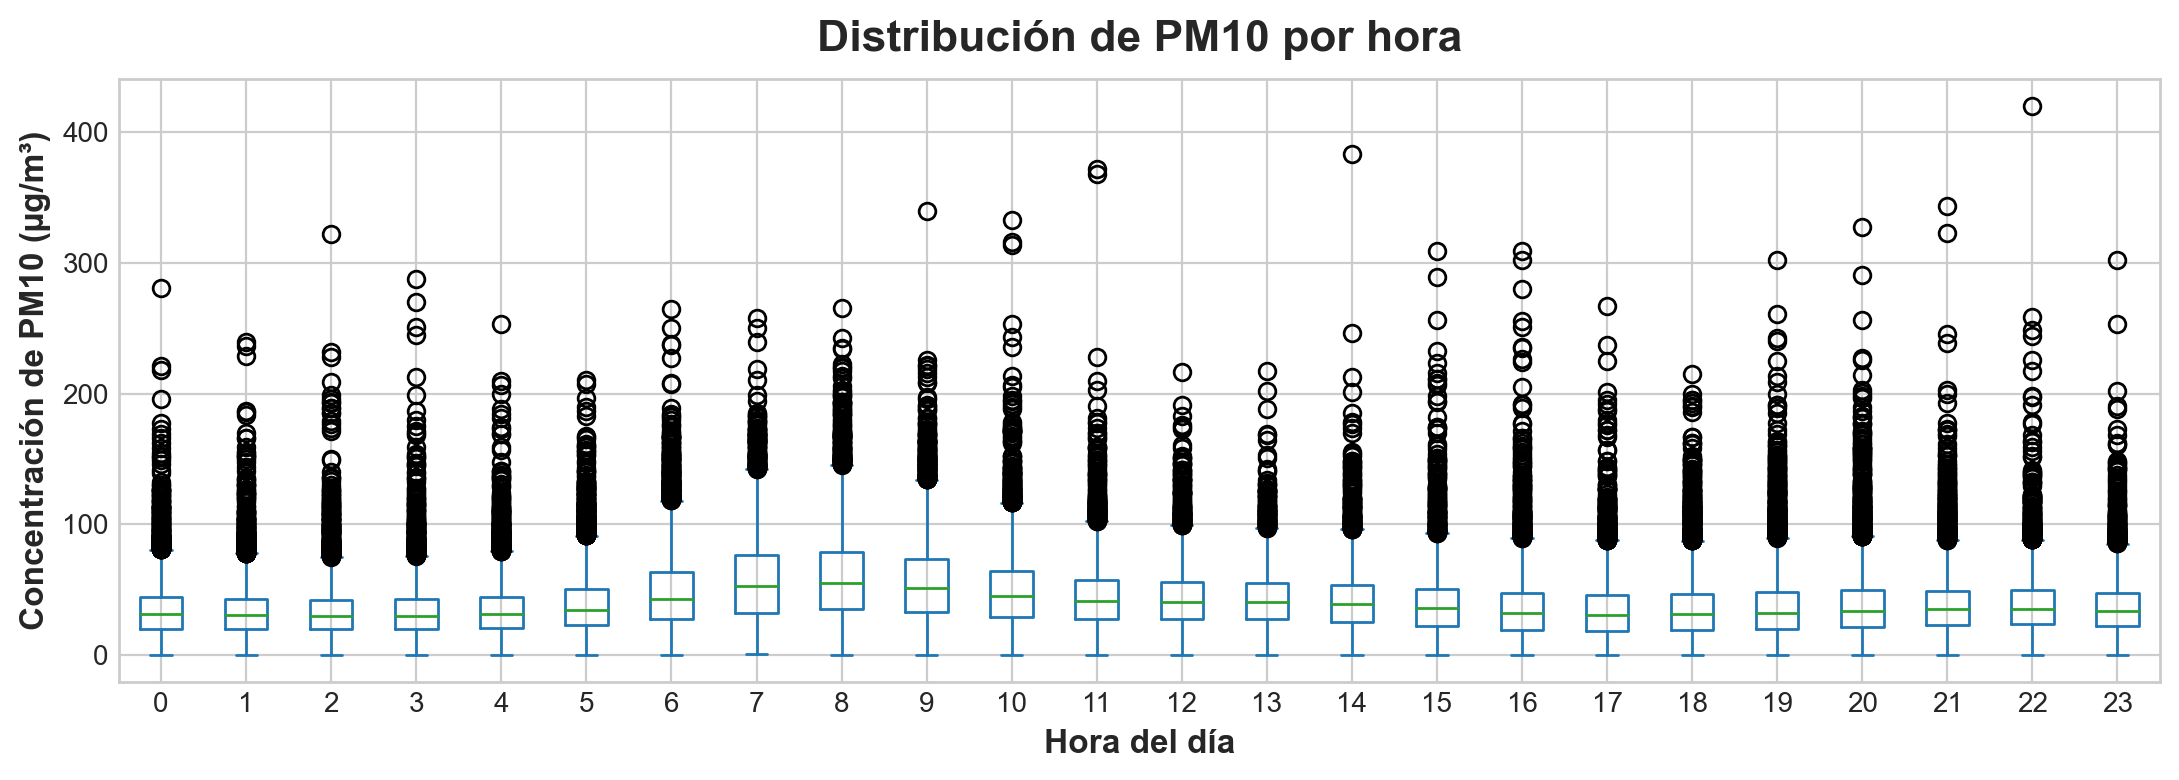

In [55]:
# Box plot para cada hora
plt.style.use("seaborn-whitegrid")
pm10_pv.set_index(pm10_pv.fecha.dt.hour, append=True)['pm10'].unstack().plot.box()
plt.xlabel("Hora del día") 
plt.ylabel("Concentración de PM10 (µg/m³)")  
plt.title("Distribución de PM10 por hora")  
plt.show() 


Se explora la distribución del *pm10* a nivel horario. Entre las 5 y 10 am se observa un aumento en la mediana con respecto a las demás horas, y una mayor dispersión en los datos de *pm10*, lo quue puede indicar que en horas de la mañana hay eventos que . A partir de las 11 am los valores de *pmn10* tienen una leve tendencia a la baja, hasta mantener un comportamiento aproximadamente constante en el resto de horas.

Se visualiza la serie de tiempo para cada estación con frecuencia horaria. 

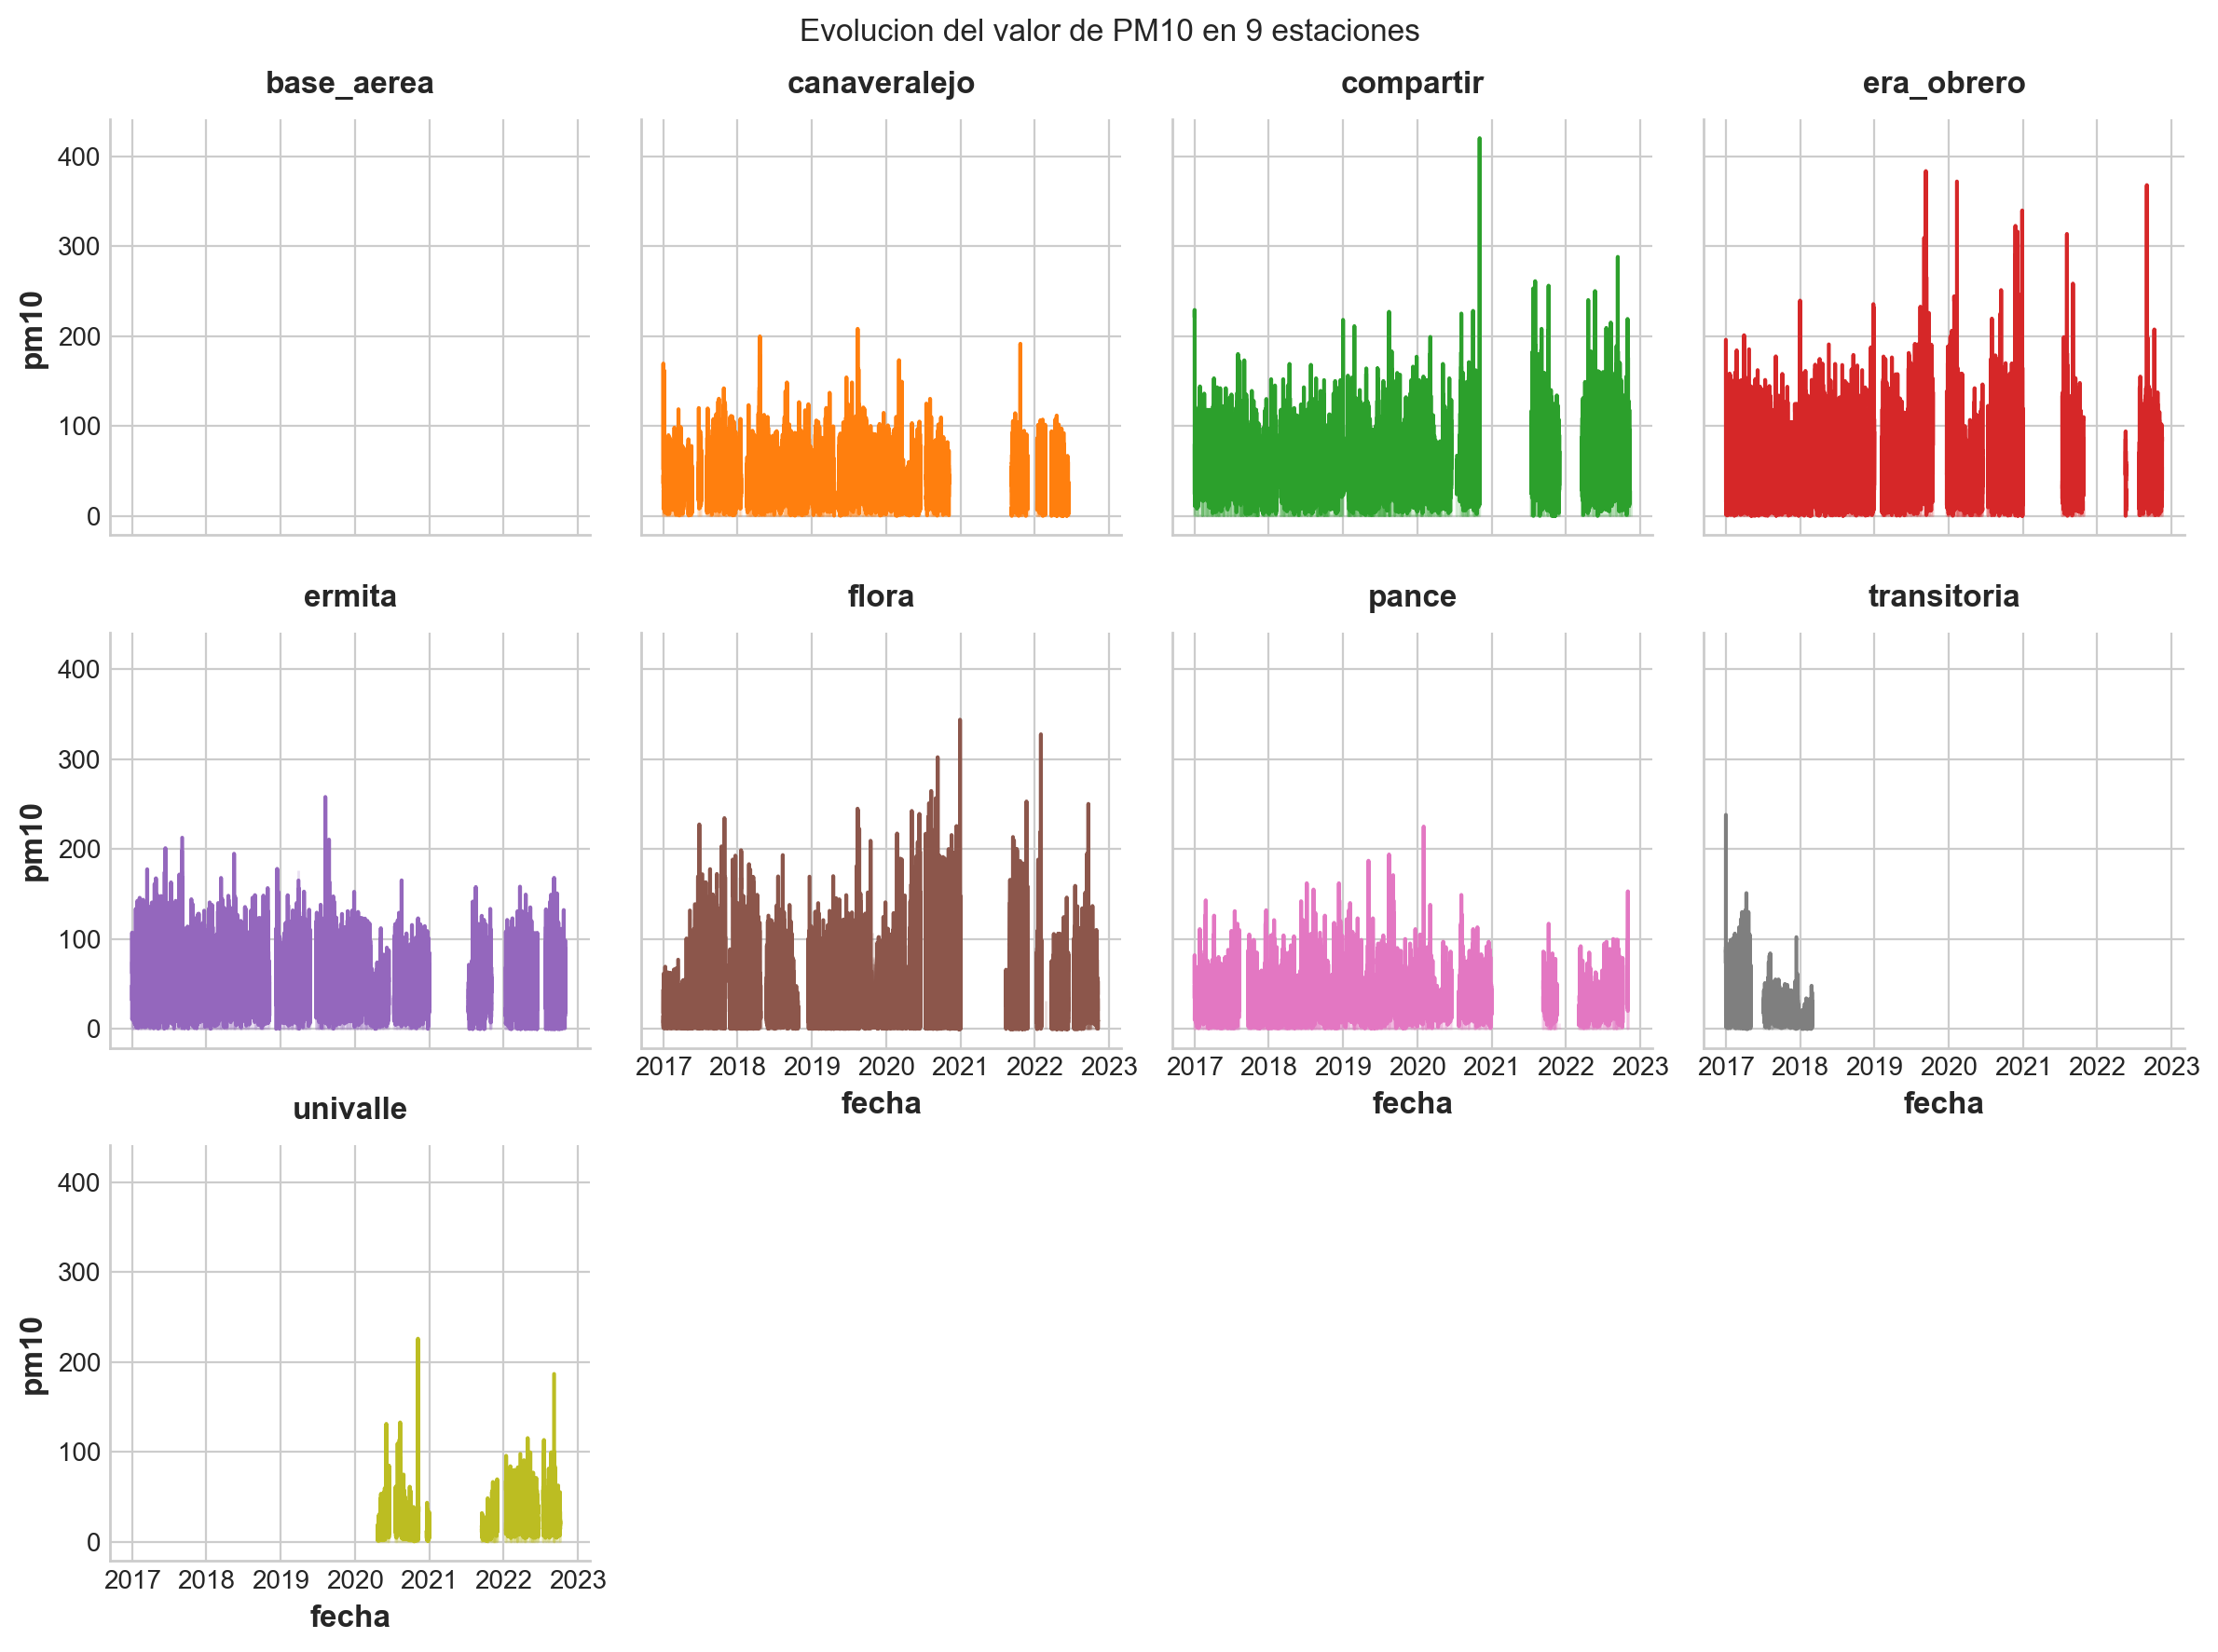

In [56]:

g = sns.FacetGrid(pm10_pv, col='estacion', hue='estacion', col_wrap=4, ) # Create a grid : initialize it
g = g.map(plt.plot, 'fecha', 'pm10') # Add the line over the area with the plot function
g = g.map(plt.fill_between, 'fecha', 'pm10', alpha=0.2).set_titles("{col_name} estacion") # Fill the area with fill_between
 
g = g.set_titles("{col_name}")# Control the title of each facet
plt.subplots_adjust(top=0.92) # Add a title for the whole plot
g = g.fig.suptitle('Evolucion del valor de PM10 en 9 estaciones')

# Show the graph
plt.show()

A simple vista se aprecia que para todas las estaciones se tienen datos faltantes. Para la estación *base_aerea* no se observa ningún valor de *pm10*. La mayoría de las estaciones presentan datos faltantes a lo largo de los años, pero en espcial entre finales de 2020 y mediados de 2021, periodo que corresponde a la pandemia ocasionada por el COVID-19. Los datos faltantes ocasionados por este periodo, se pueden considerar de naturaleza MANR (Faltantes no al azar), ya que su medición se vio afectada por un evento identificable. Los demás valores faltantes presentes a lo largo de los años, pueden ser de naturaleza MAR (Faltantes al azar) o MCAR (Faltantes completamente al azar), pero no se tiene suficiente información para afirmarlo.

Se realiza un analisis de la evolución del *pm10* a lo largo de los años. En el grafico de caja y bigotes, no se observan una diferencia en los tamaños de las cajas, lo que puede indicar que la dispersión de los valores de *pm10* a lo largo de los años se ha mantenido constante. A su vez, las cajas se ubican dentro del mismo rango de valores, por lo que no hay indicios de una tendencia a la alza o a la baja en los valores de la variable a través de los años.

Text(0.5, 1.0, 'Distribución de PM10 por año')

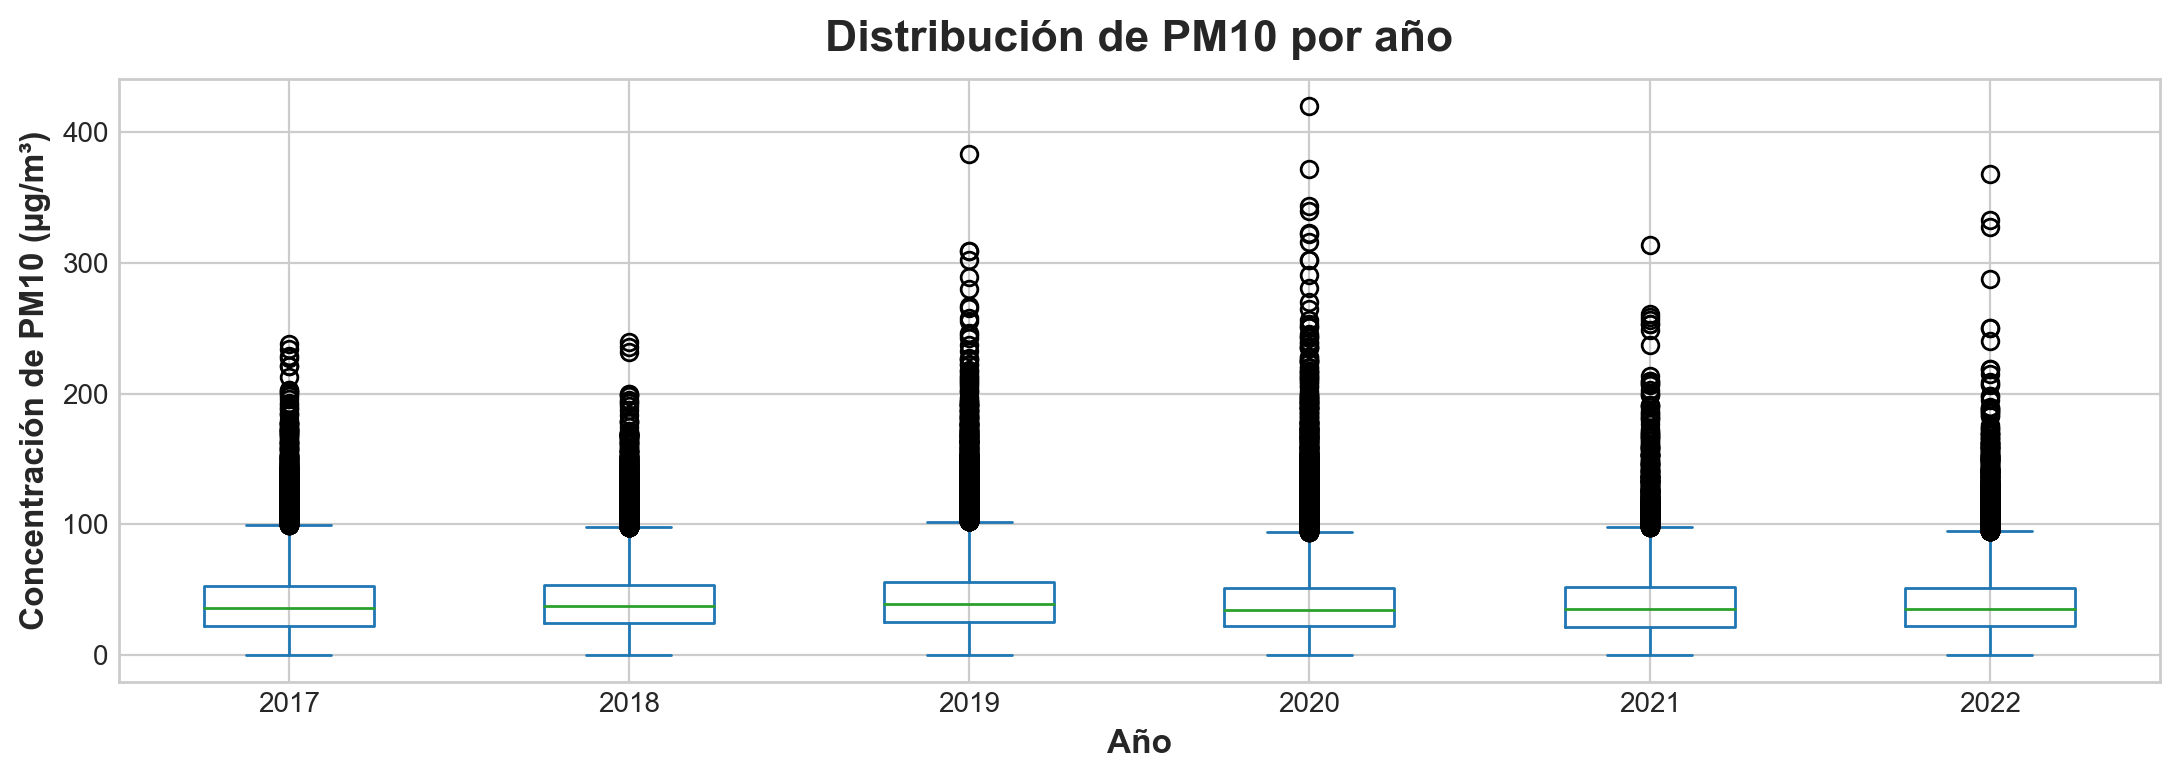

In [57]:
# Box plot por año
pm10_pv.set_index(pm10_pv.fecha.dt.year, append=True)['pm10'].unstack().plot.box()
plt.xlabel("Año") 
plt.ylabel("Concentración de PM10 (µg/m³)")  
plt.title("Distribución de PM10 por año")  

Al observar el comportamiento anual del *pm10* para cada estación, se logra aprecia lo siguiente:
* Para la estación *carnaveralejo* se ve una tendencia a la baja a partir del 2019.
* La estación *compartir* muestra comportamiento constante entre los años 2019 y 2020, y una tendencia a la alza a partir del año 2021.
* En el caso de la estación *era obrero* se ve un crecimiento en el valor promedio del *pm10* desde el 2017 hasta el 2019, y apartir de ahi, se tiene una tendencia a la baja. 
* La estación *ermita* muestra un comportamiento constante desde el 2017 hasta el 2019, con una disminución en el promedio de *pm10* en el año 2020, a partir del cual el valor de *pm10* tiende a la alza. 
* La estación *flora* ha tenido alzas y bajas a lo largo de los años.
* La estación *pance* no ha tenido grandes variaciones en los valores de *pm10* promedio registrados.


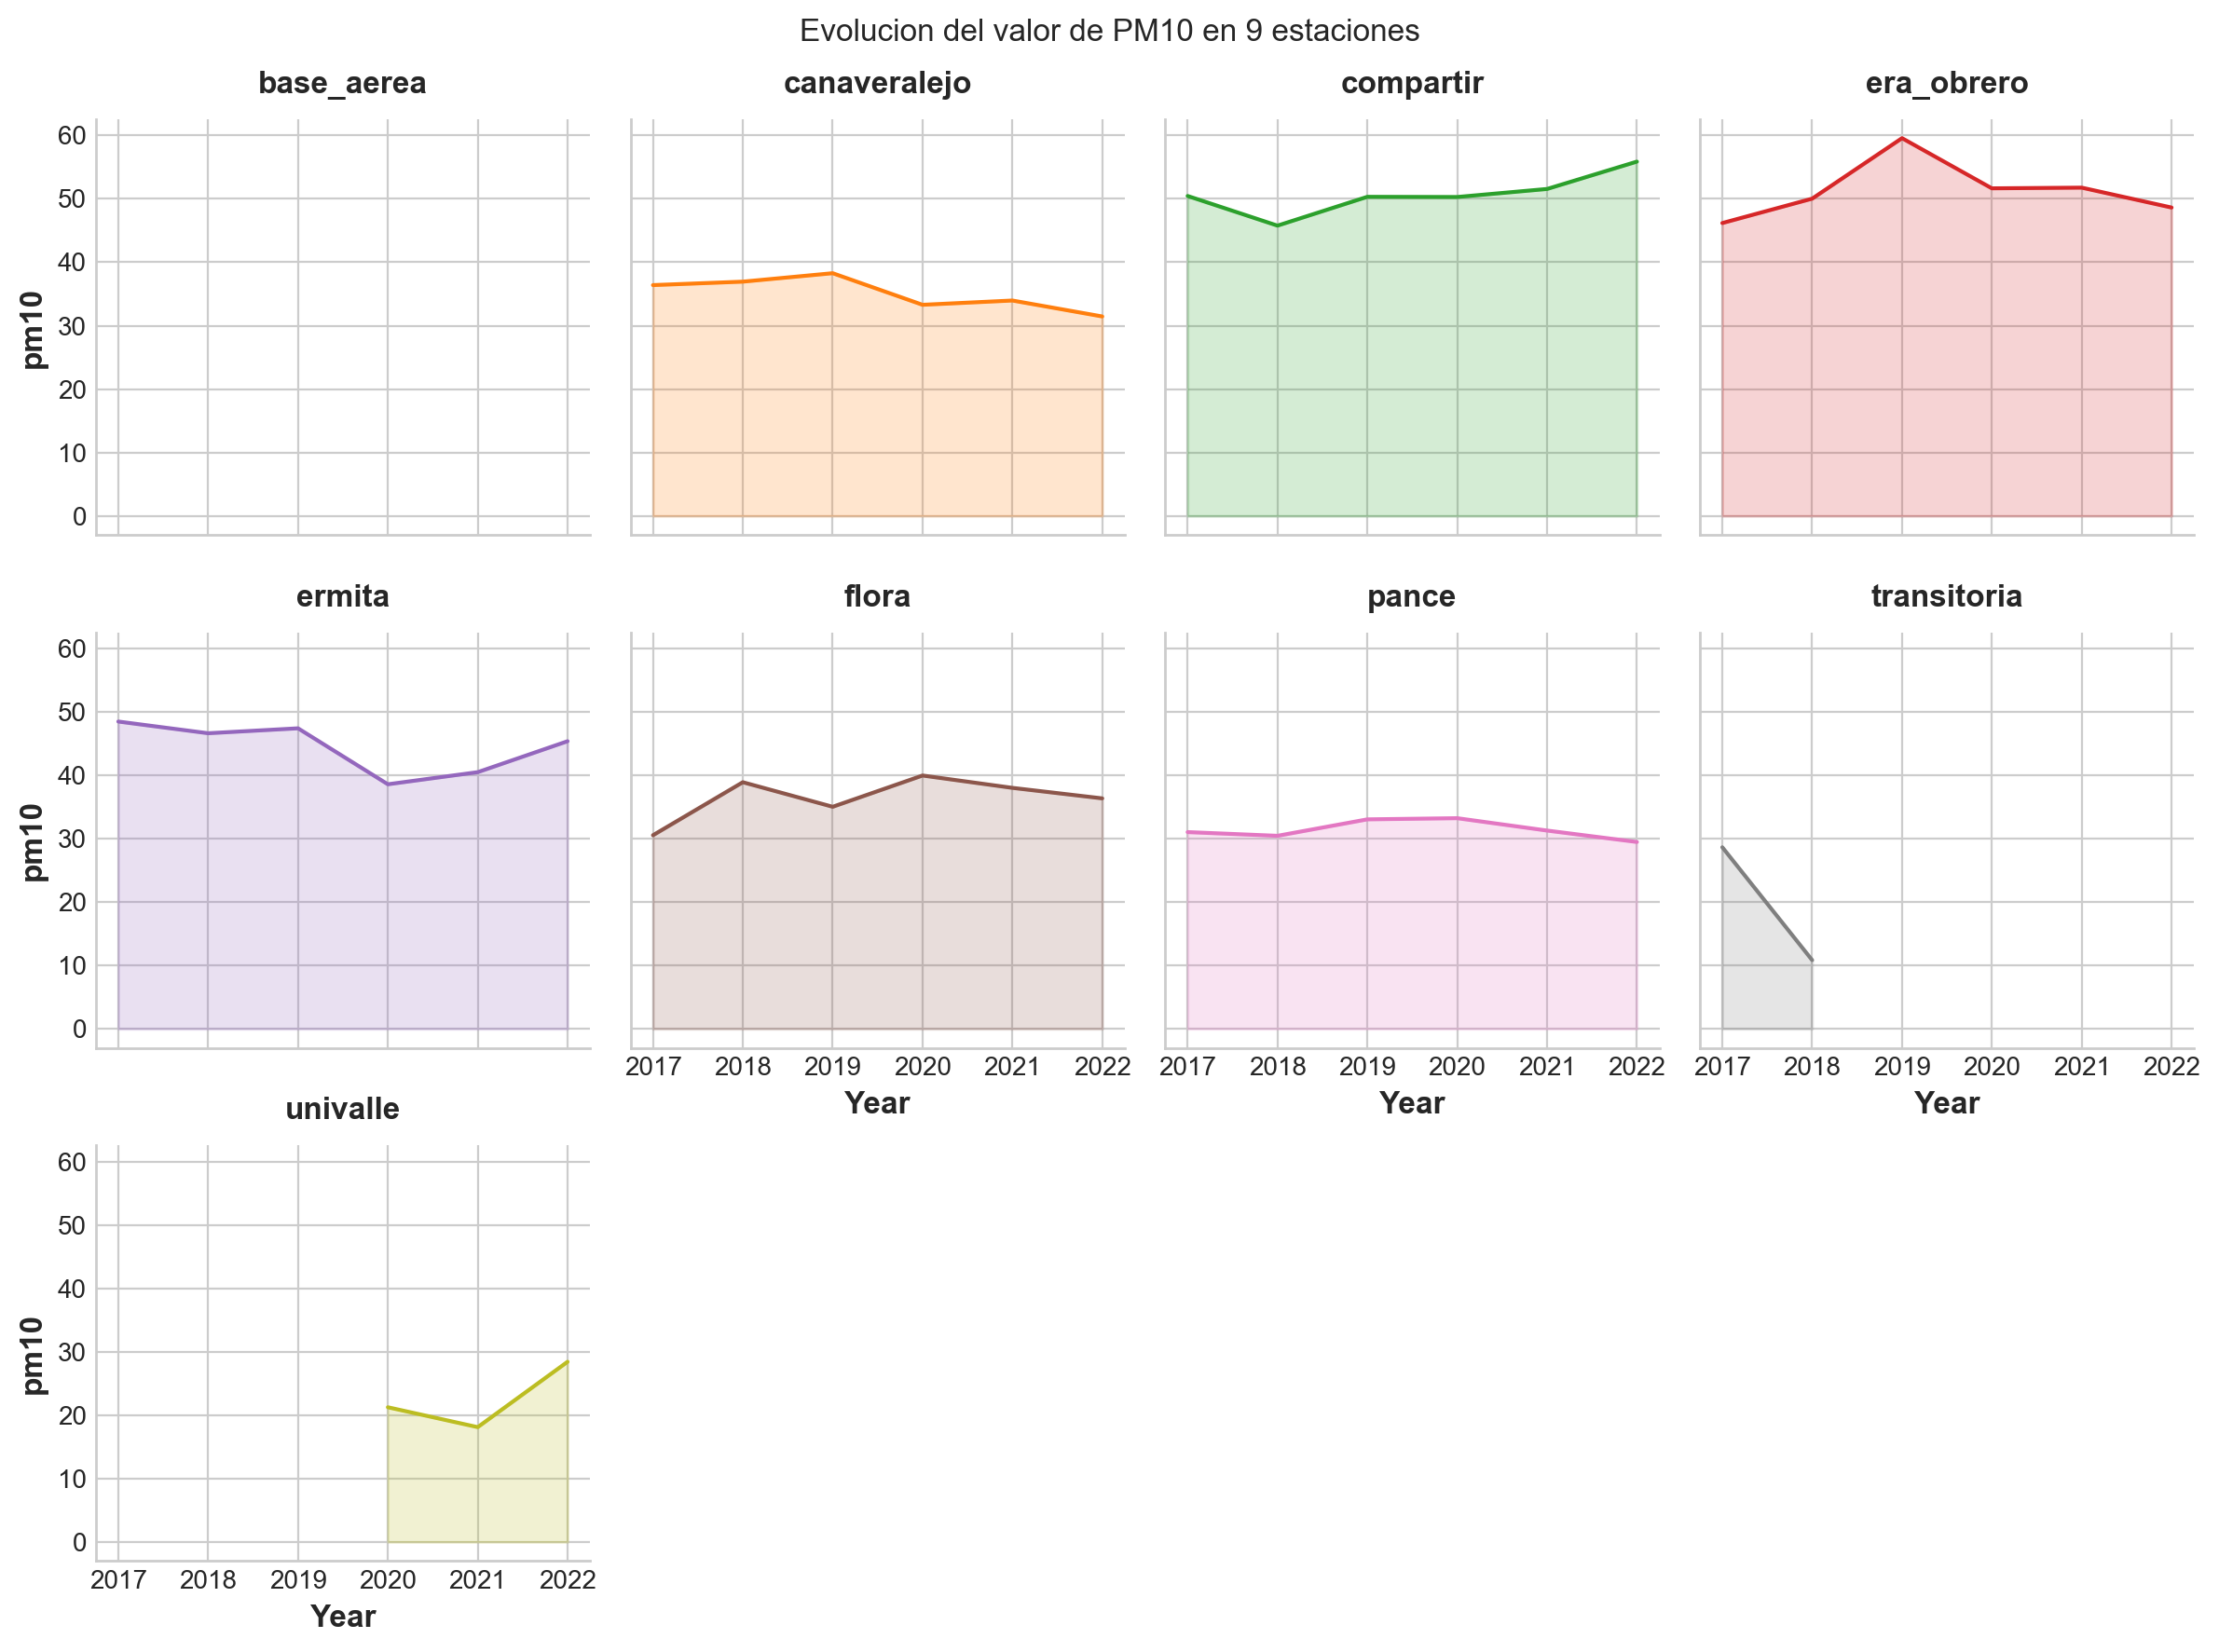

In [58]:
pm10_year = pm10_pv.groupby(["Year", "estacion"])["pm10"].mean().reset_index()

g = sns.FacetGrid(pm10_year, col='estacion', hue='estacion', col_wrap=4, ) # Create a grid : initialize it
g = g.map(plt.plot, 'Year', 'pm10') # Add the line over the area with the plot function

g = g.map(plt.fill_between, 'Year', 'pm10', alpha=0.2).set_titles("{col_name} estacion") # Fill the area with fill_between
g = g.set_titles("{col_name}") # Control the title of each facet

plt.subplots_adjust(top=0.92) # Add a title for the whole plot
g = g.fig.suptitle('Evolucion del valor de PM10 en 9 estaciones')

# Show the graph

En cuanto al comportamiento mes a mes del *pm10*, no se logra identificar una diferencia significativa en la distribución de la variable, como se logra pareciar en los graficos de caja y bigotes, las cajas se superponen, indicando que el comportamiento en los valores de *pm10* no dependen de los meses del año. 

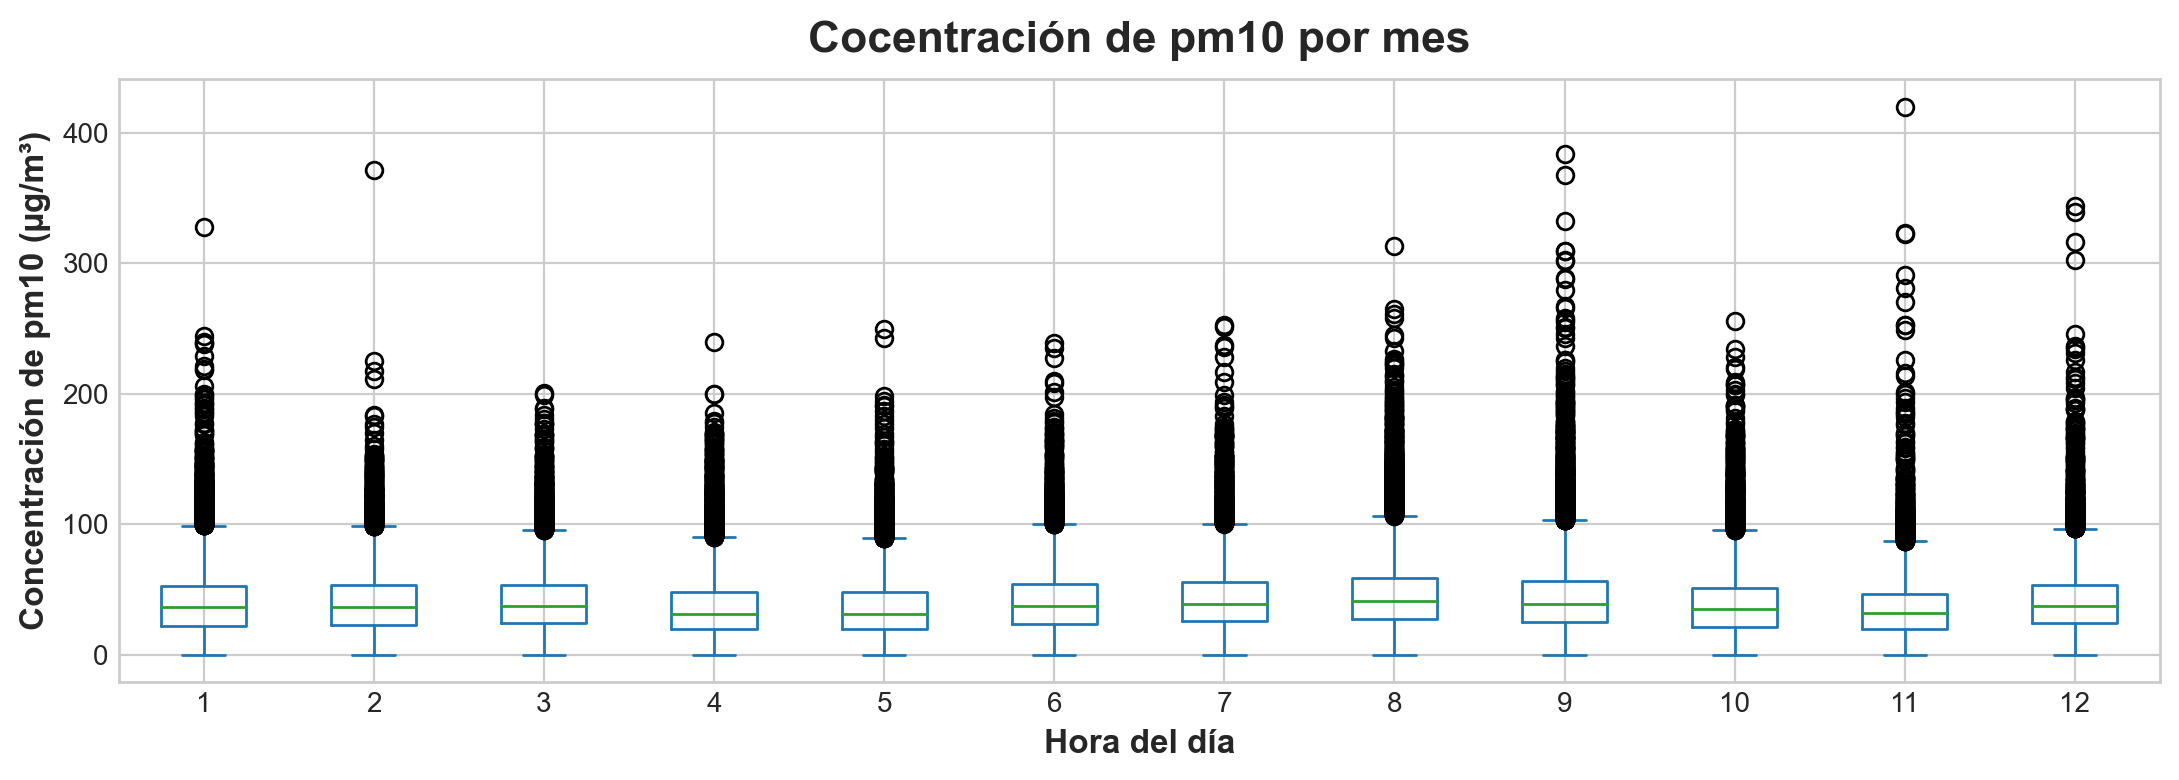

In [59]:
# Box plot por mes
pm10_pv.set_index(pm10_pv.fecha.dt.month, append=True)['pm10'].unstack().plot.box()
plt.xlabel("Hora del día") 
plt.ylabel("Concentración de pm10 (µg/m³)")
plt.title("Cocentración de pm10 por mes")
plt.show()

Similar ocurre con los días de la semana, en los que la distribución de los graficos de caja indica que no hay una gran diferencia en los valores de *pm10* según el día de la semana en que se hace la medición, aunque en el caso del día domingo, se logra ver que se registran valores mas bajo de *pm10* y hay una menor dispersión, en comparación a los otros días de la semana.

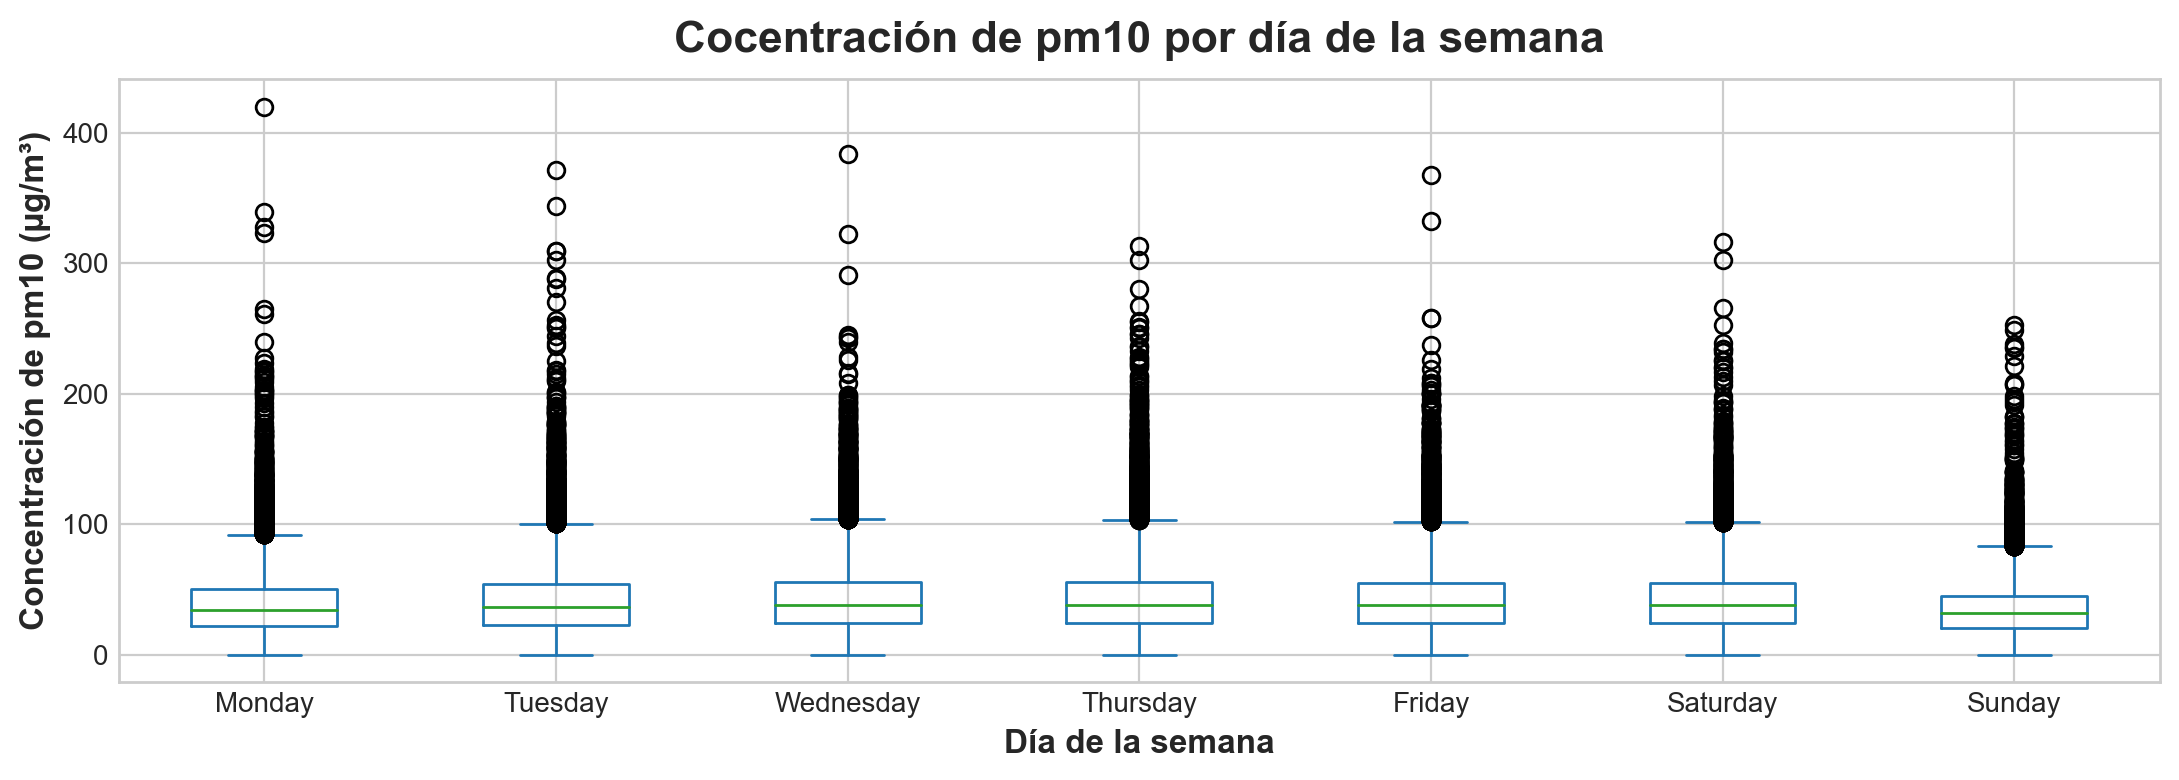

In [60]:
pm10_pv['Weekday'] = (pd.Categorical(pm10_pv['fecha'].dt.strftime('%A'),
                                           categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])
                           )

pm10_pv.set_index(pm10_pv.Weekday, append=True)['pm10'].unstack().plot.box()
plt.xlabel("Día de la semana") 
plt.ylabel("Concentración de pm10 (µg/m³)")
plt.title("Cocentración de pm10 por día de la semana")
plt.show()

## Datos faltantes

Como se pudo observar en los graficos a nivel de estación, existen datos faltantes para el *pm10* en cada una de las estaciones, para tener una cuantificación de los datos faltantes, se obtiene el porcentaje de datos faltantes de *pm10* para cada una de las estaciones.

In [61]:
def null_percentage(df):
    """
    This function calculates the percentage of null values per column in a DataFrame.
    """
    null_counts = df.isnull().sum()
    total_counts = df.shape[0]
    null_percentages = (null_counts / total_counts) * 100
    return null_percentages
 
# Process data for each station and compute the null percentage
stations = pm10_pv['estacion'].unique()
null_percentage_results = {}
 
for station in stations:
    data_current_estacion = pm10[pm10['estacion'] == station].copy()
    pivoted_data_current_estacion = data_current_estacion.pivot(index='fecha', columns='variable', values='medicion').reset_index().drop_duplicates()
    null_percentage_results[station] = null_percentage(pivoted_data_current_estacion)
 
# Convert results to a DataFrame for better visualization
null_percentage_df = pd.DataFrame(null_percentage_results).T  # Transpose to get stations as rows
 
# fill null values with 100 (meaning 100% of null values)
null_percentage_df = null_percentage_df.fillna(100)
 
# format numbers
numeric_cols = null_percentage_df.select_dtypes(include=['number']).columns.tolist()
 
null_percentage_df["pm10"] = null_percentage_df["pm10"].astype("int64")
   
null_percentage_df.loc[:,["pm10"]]

variable,pm10
base_aerea,100
canaveralejo,40
compartir,27
era_obrero,33
ermita,25
flora,32
pance,31
transitoria,85
univalle,77


Al observar los datos faltantes de *pm10* para cada una de las estaciones, se concluye que la mejor estación para trabajar es la estación *ermita*, ya que presenta el menor porcentaje de datos faltantes (25%).

In [62]:
# filtrar datos de la estacion ermita
ermita = pm10_pv[pm10_pv["estacion"]=="ermita"]
ermita.head()

variable,fecha,estacion,black_carbon,direccion_viento,h2s,humedad,lluvia,no2,o3,pm10,...,radiacion_solar,so2,temperatura,temperatura_10_m,uv-pm,velocidad_viento,fecha_,Year,Mes,Weekday
4,2017-01-01 00:59:59+00:00,ermita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.9,...,NaN,2.147475,NaN,NaN,NaN,NaN,2017-01-01,2017,1,Sunday
13,2017-01-01 01:59:59+00:00,ermita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,...,NaN,2.068908,NaN,NaN,NaN,NaN,2017-01-01,2017,1,Sunday
22,2017-01-01 02:59:59+00:00,ermita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.6,...,NaN,2.461739,NaN,NaN,NaN,NaN,2017-01-01,2017,1,Sunday
31,2017-01-01 03:59:59+00:00,ermita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.3,...,NaN,2.252229,NaN,NaN,NaN,NaN,2017-01-01,2017,1,Sunday
40,2017-01-01 04:59:59+00:00,ermita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.1,...,NaN,2.068908,NaN,NaN,NaN,NaN,2017-01-01,2017,1,Sunday


### Datos de prueba (test)

Antes de proceder, se obtiene el dataset que se utilizará para hacer las pruebas de los modelos que serán implementados. Este dataset de prueba (test), se conforma de las ultimas 24 horas consecutivas con regsitros de *pm10*, que corresponden a los registros del 31-10-2022.

In [63]:
test_data = ermita.loc[ermita["fecha_"]=="2022-10-31", ["fecha", "pm10"]].reset_index().drop("index", axis=1)
display(test_data)

variable,fecha,pm10
0,2022-10-31 00:59:59+00:00,49.3
1,2022-10-31 01:59:59+00:00,45.1
2,2022-10-31 02:59:59+00:00,37.3
3,2022-10-31 03:59:59+00:00,34.8
4,2022-10-31 04:59:59+00:00,38.3
5,2022-10-31 05:59:59+00:00,44.0
6,2022-10-31 06:59:59+00:00,61.2
7,2022-10-31 07:59:59+00:00,53.4
8,2022-10-31 08:59:59+00:00,96.0
9,2022-10-31 09:59:59+00:00,98.6


Para los datos que se utilizrán para entrenar los modelos de series de tiempo, se utilizarán los datos anteriores a la fecha 2022-11-08:

In [64]:
ermita = ermita.loc[ermita["fecha_"]<"2022-10-31"]
ermita.tail()

variable,fecha,estacion,black_carbon,direccion_viento,h2s,humedad,lluvia,no2,o3,pm10,...,radiacion_solar,so2,temperatura,temperatura_10_m,uv-pm,velocidad_viento,fecha_,Year,Mes,Weekday
459823,2022-10-30 19:59:59+00:00,ermita,NaN,NaN,NaN,71.2,NaN,NaN,NaN,31.3,...,NaN,NaN,27.0,NaN,NaN,NaN,2022-10-30,2022,10,Sunday
459832,2022-10-30 20:59:59+00:00,ermita,NaN,NaN,NaN,71.5,NaN,NaN,NaN,14.9,...,NaN,NaN,27.0,NaN,NaN,NaN,2022-10-30,2022,10,Sunday
459841,2022-10-30 21:59:59+00:00,ermita,NaN,NaN,NaN,75.3,NaN,NaN,NaN,14.5,...,NaN,NaN,26.3,NaN,NaN,NaN,2022-10-30,2022,10,Sunday
459850,2022-10-30 22:59:59+00:00,ermita,NaN,NaN,NaN,78.6,NaN,NaN,NaN,14.3,...,NaN,NaN,25.5,NaN,NaN,NaN,2022-10-30,2022,10,Sunday
459859,2022-10-30 23:59:59+00:00,ermita,NaN,NaN,NaN,83.2,NaN,NaN,NaN,32.2,...,NaN,NaN,24.6,NaN,NaN,NaN,2022-10-30,2022,10,Sunday


La distribución del *pm10* para la estación *ermita¨se muestra a continuación:

Text(0.5, 0, ' pm10 (µg/m³)')

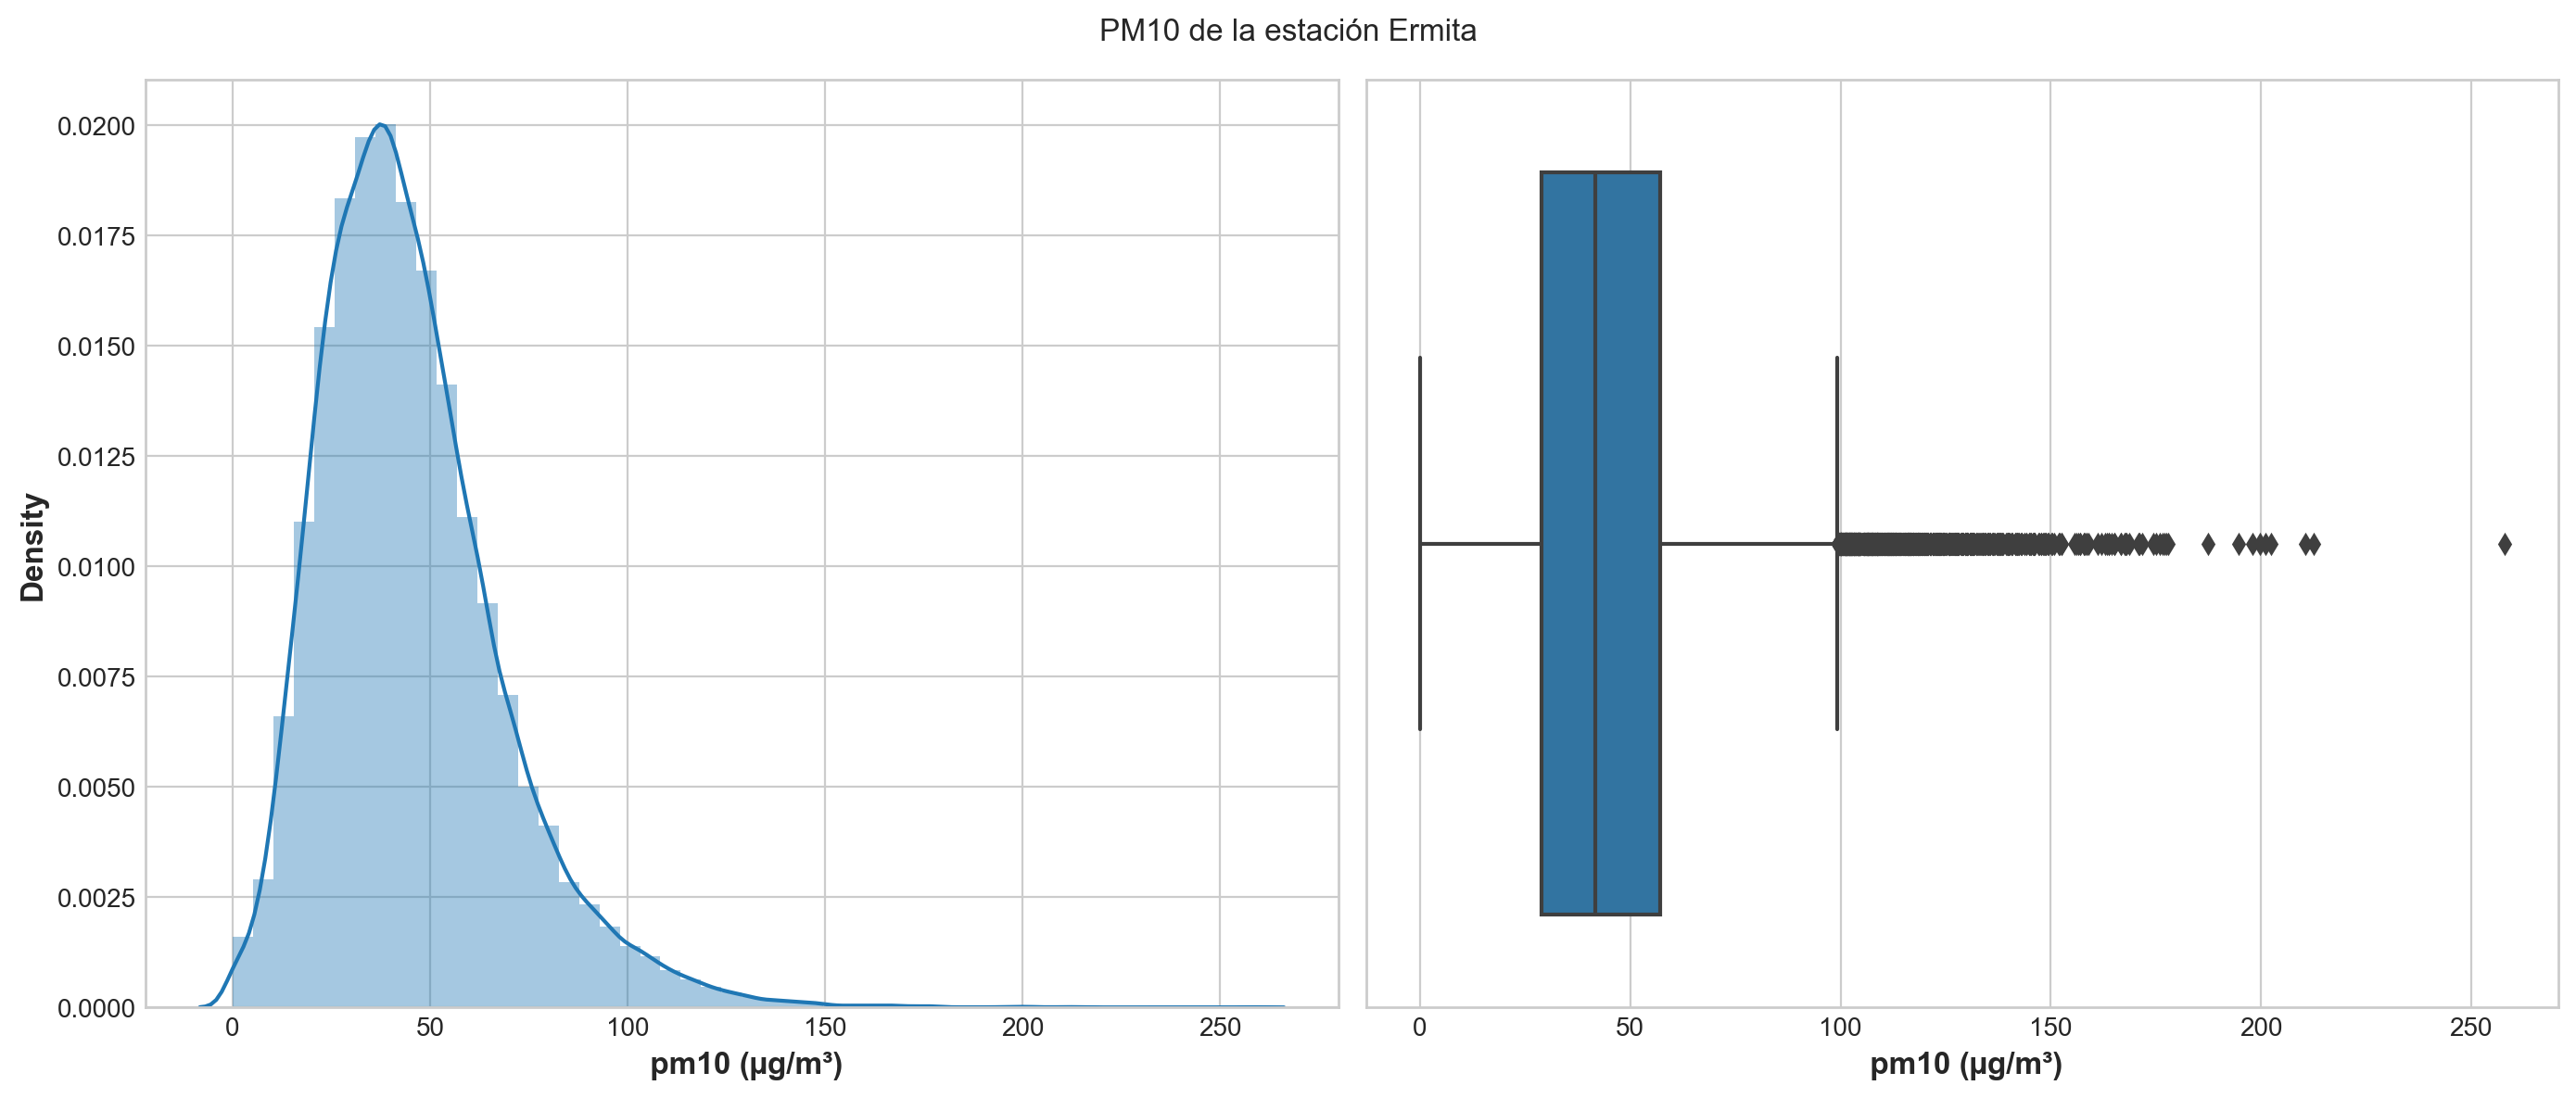

In [65]:
# Grafico de densidad y boxplot para la distribucion del pm10
plt.figure(figsize=(14, 6))
plt.suptitle('PM10 de la estación Ermita')  # Agregar título
plt.subplot(1, 2, 1) # grafico de densidad
sns.distplot(ermita["pm10"], norm_hist=False)
plt.xlabel(" pm10 (µg/m³)")

plt.subplot(1, 2, 2) # boxplot
sns.boxplot(x=ermita["pm10"])
plt.xlabel(" pm10 (µg/m³)")

## Imputación de datos faltantes

Con el fin de realizar las predicciones de *pm10* para la estación *ermita*, se aplicarán distintas tecnicas de imputación de datos para los datos faltantes, con el fin de escoger la que afecta en la menor medida la distribución de la variable.

In [66]:
# for Kalman Smoothing use R and R objects
import rpy2.robjects as robjects
# import R packages
from rpy2.robjects.packages import importr
imputeTS = importr('imputeTS') 

kalman_StructTs = robjects.r['na.kalman']
kalman_auto_arima = robjects.r['na.kalman']

# for other imputation methods
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
# grafico de la serie de tiempo y los datos imputados
def method_plot(df, cols):
    fig, ax = plt.subplots()
    if isinstance(cols, str):
        df[cols].plot(style='b--', ax=ax)
    else:
        for c in cols:
            df[c].plot(style='b--', ax=ax)        
    df['pm10'].plot(style='bo', ax=ax)

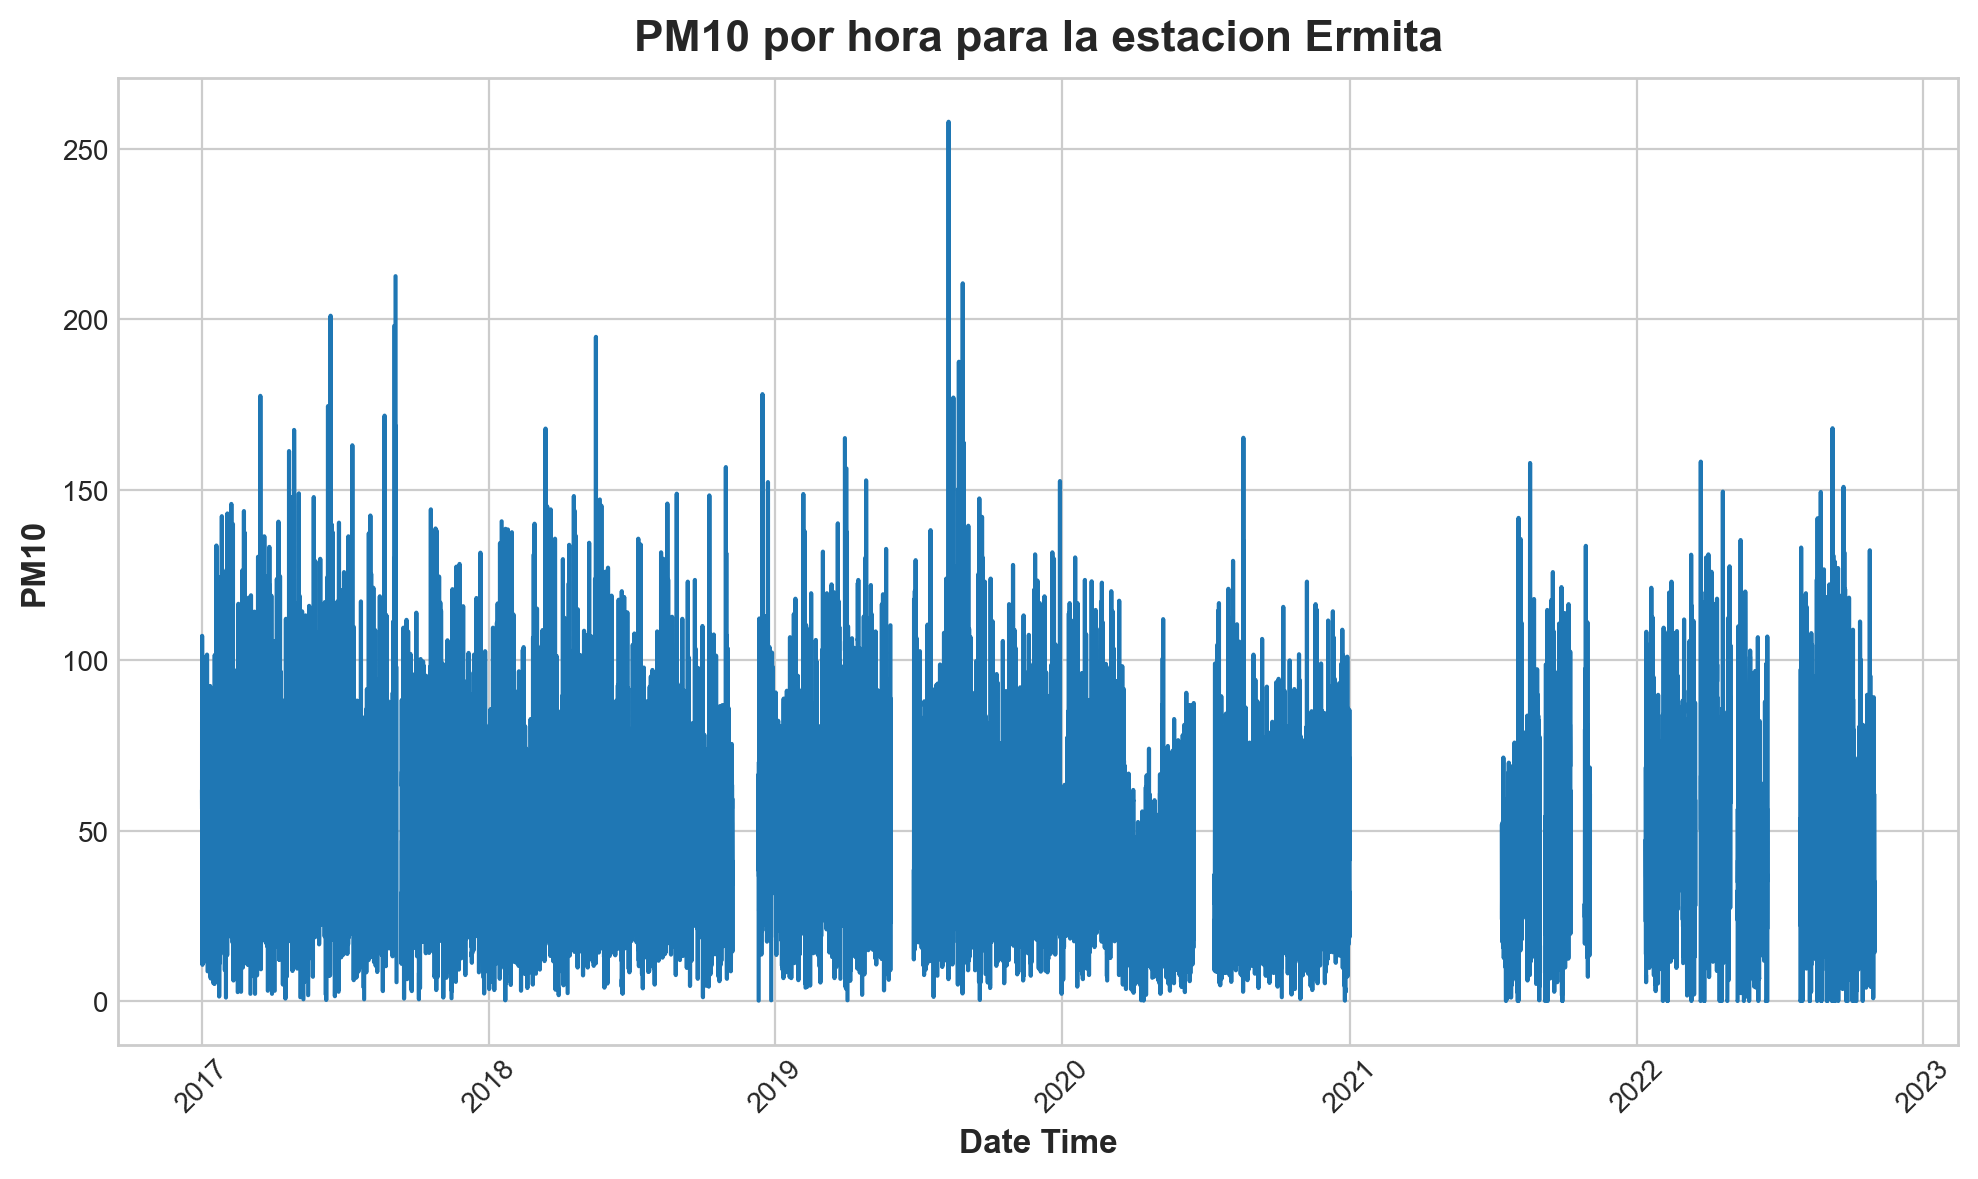

In [68]:
# grafico del pm10
plt.figure(figsize=(10, 6))
plt.plot(
    ermita['fecha'],
    ermita['pm10'],
)

# formato del grafico
plt.xlabel('Date Time')
plt.ylabel('PM10')
plt.title('PM10 por hora para la estacion Ermita')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [69]:
# funcion para generar el grafico de los datos imputados
def plot_impute (col, title):
    # sns.set_theme(style="whitegrid")
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6)) 
    title_prefix= "Serie de tiempo y datos imputado con "
    
    full_title = f"{title_prefix}: {title}"

    # Grafico de serie de tiempo
    ermita[col].plot(style='b--', ax=ax1)
    
    ax1.set_title(full_title)  # Add title for subplot 1
    ax1.set_xlabel('Tiempo')  # Add x-axis label for subplot 1
    ax1.set_ylabel('PM10 (µg/m³)')  # Add y-axis label for subplot 1

    # Grafico de densidad
    sns.kdeplot(ermita['pm10'], fill=True, color="r", ax=ax2)  # Plot original pm10 density in subplot 2
    sns.kdeplot(ermita[col], fill=True, color="b", ax=ax2)  # Plot LOCF-imputed pm10 density in subplot 2
    ax2.set_title('Grafico de densidad')  # Add title for subplot 2
    ax2.set_xlabel('PM10 (µg/m³)')  # Add x-axis label for subplot 2
    ax2.set_ylabel('Density')  # Add y-axis label for subplot 2

    plt.tight_layout()  

    plt.show()


### Imputación con ultima observación 

Se realiza la imputación con la ultima observación, en la cual se reemplazan los valores faltantes por el último valor observado antes del dato faltante.

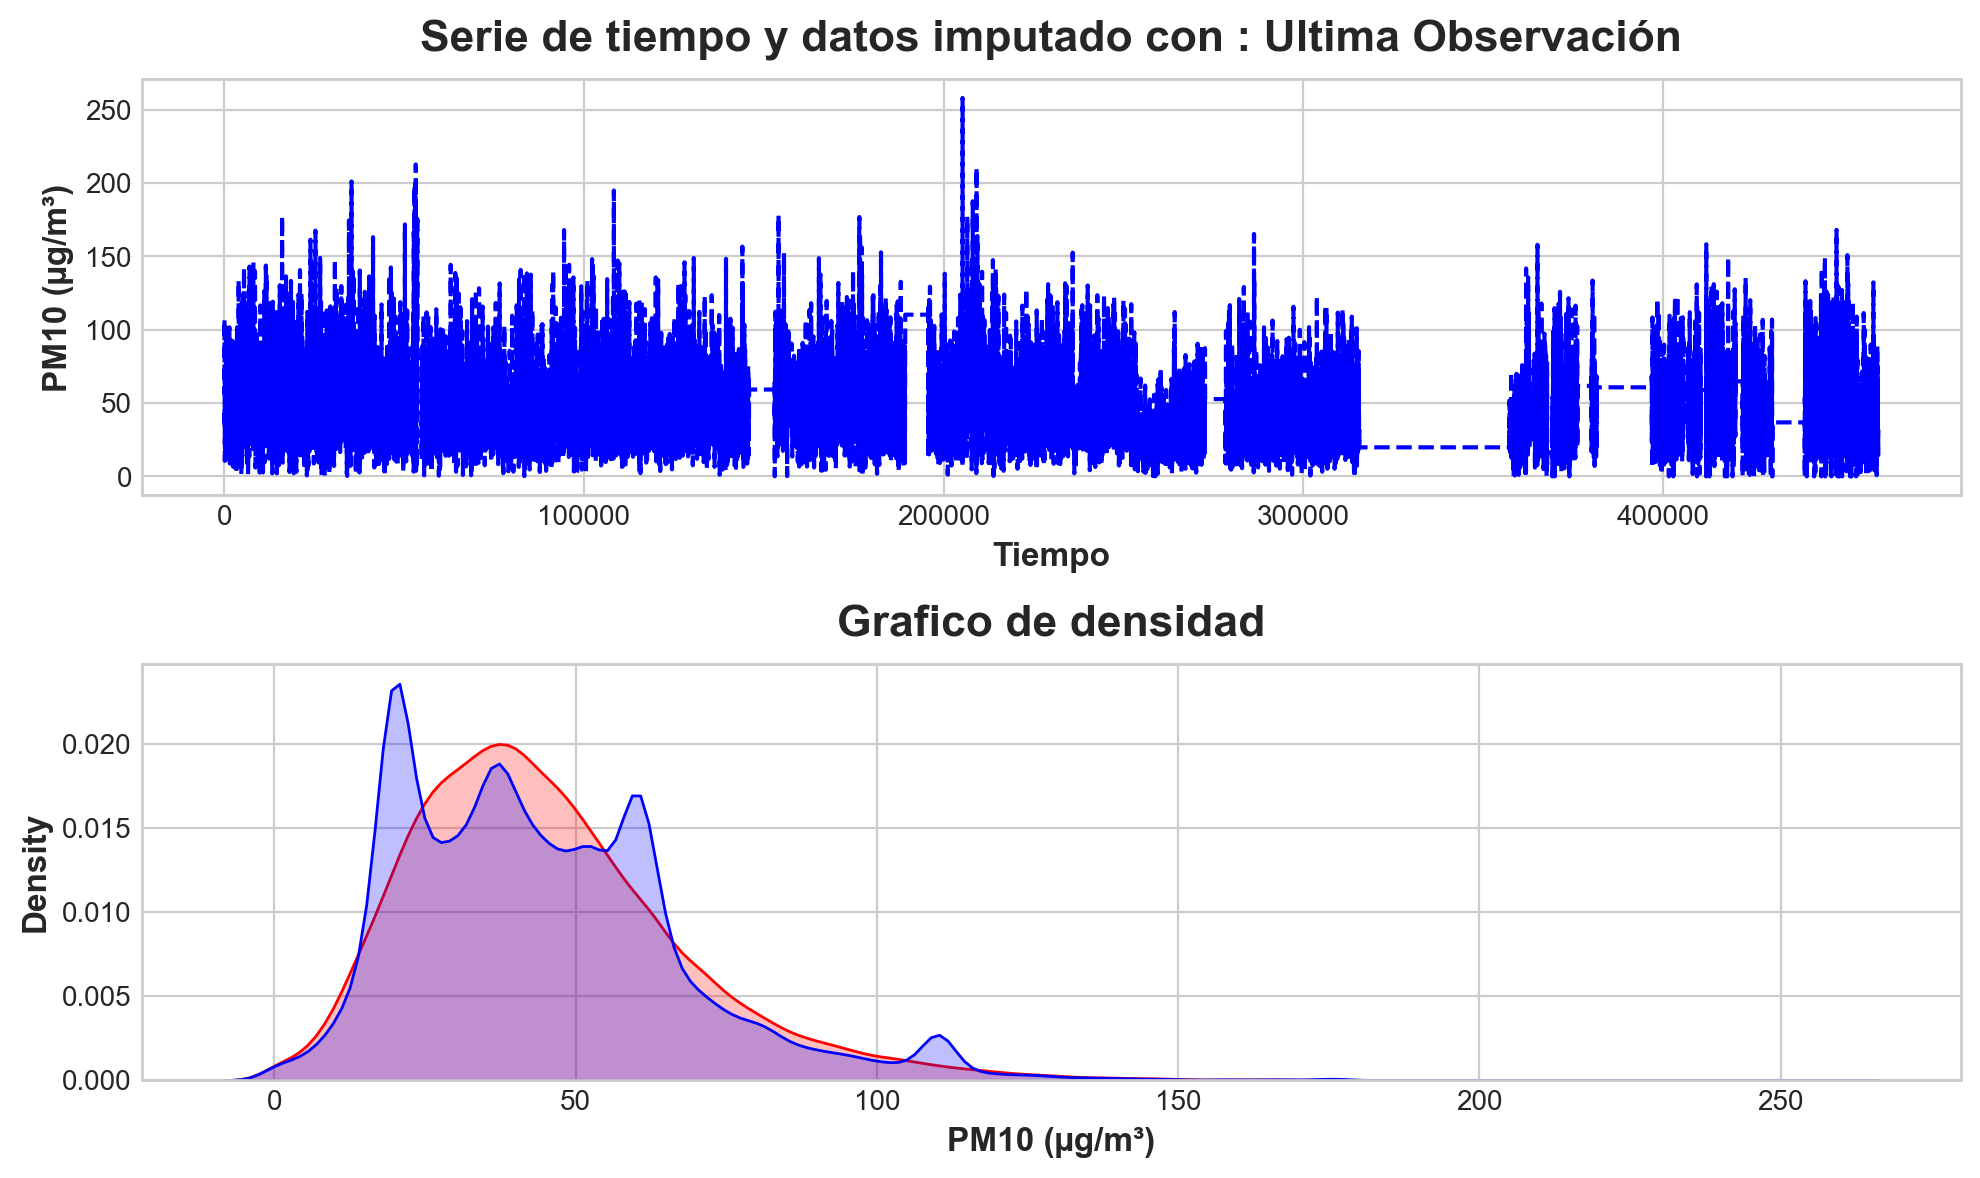

In [70]:
ermita['pm10_LOCF'] = ermita['pm10'].fillna(method='ffill')
plot_impute('pm10_LOCF', "Ultima Observación")

Se logra ver en el grafico de la serie de tiempo los datos imputados como un valor constante para los periodos de tiempo donde habian gran cantidad de datos faltantes, alrededor del 2020-2021. El grafico de densidad muestra que la distribución para el *pm10* se ha visto altatamente afectada por la imputación realizada, por lo que este metodo no es adecuado para tratar los datos faltantes. 

#### Imputación interpolación lineal

Este método estima los valores faltantes mediante una línea recta que une los dos valores observados más cercanos al dato faltante

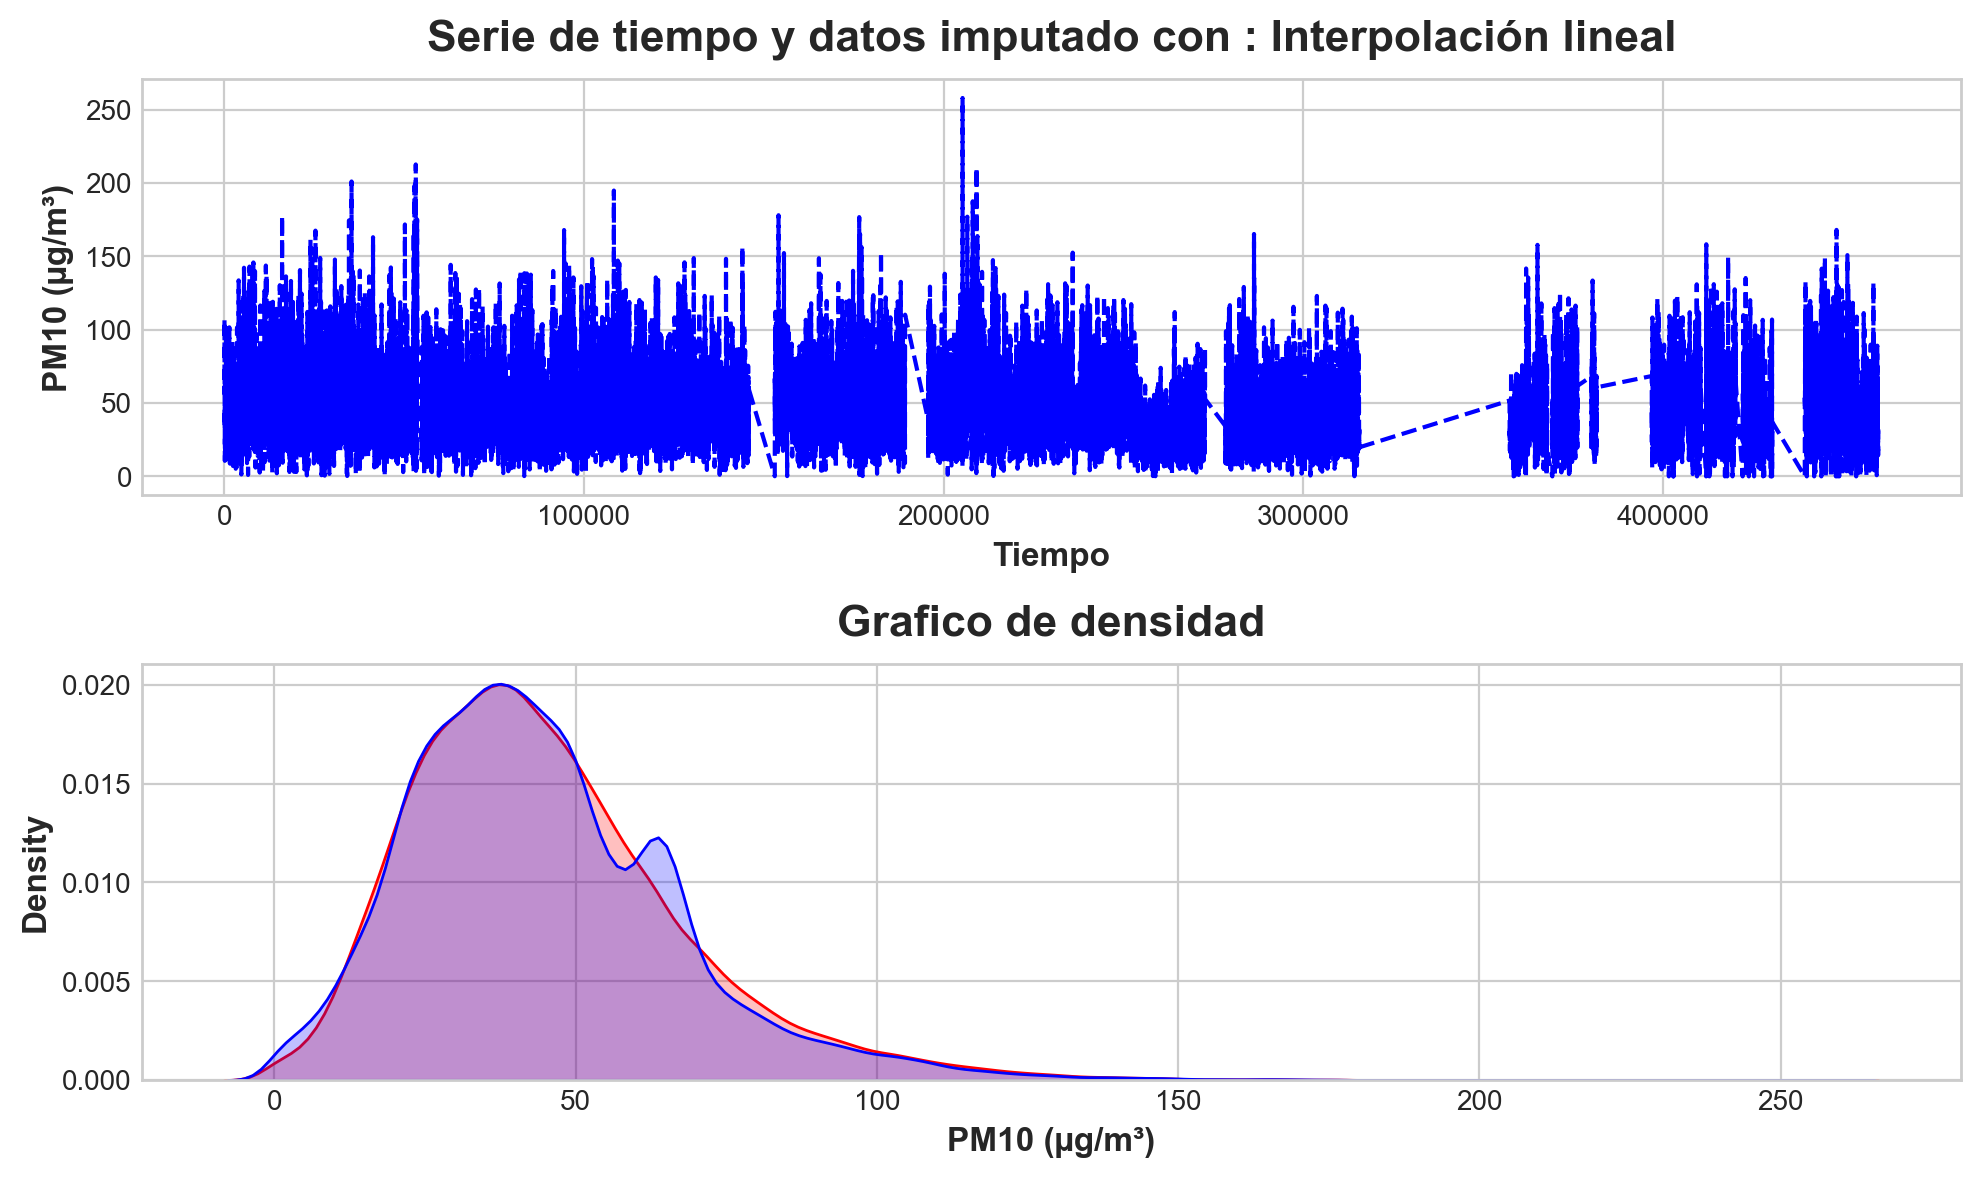

In [71]:
# Linear Interpolation
ermita['pm10_linear_interpolation'] = ermita['pm10'].interpolate(method='linear')
plot_impute('pm10_linear_interpolation', "Interpolación lineal")

Se logra ver en el grafico de la serie de tiempo los datos imputados como segemntos lineales  para los periodos de tiempo donde habian gran cantidad de datos faltantes. El grafico de densidad muestra que la distribución para el *pm10* es aproximadamente similar a la distribución original del *pm10*, ya que hay una gran concentración de los datos hacia valores inferiores de 50 µg/m3, pero se forma una nueva concentración de datos alrededor de los 60-70 µg/m3, que no hace parte de la distribución real, que puede afectar el ajuste de los modelo. 

In [72]:
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(ermita["pm10"].dropna(), ermita["pm10_linear_interpolation"])
print(f" Mann.Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Mann.Whitney U Test: statistic=1010738433.0000, p-value=0.0054


#### Inputación con medias moviles

Este método reemplaza los valores faltantes por el promedio de los valores observados en una ventana móvil alrededor del dato faltante. Para este caso se utiliza una ventana de 24.

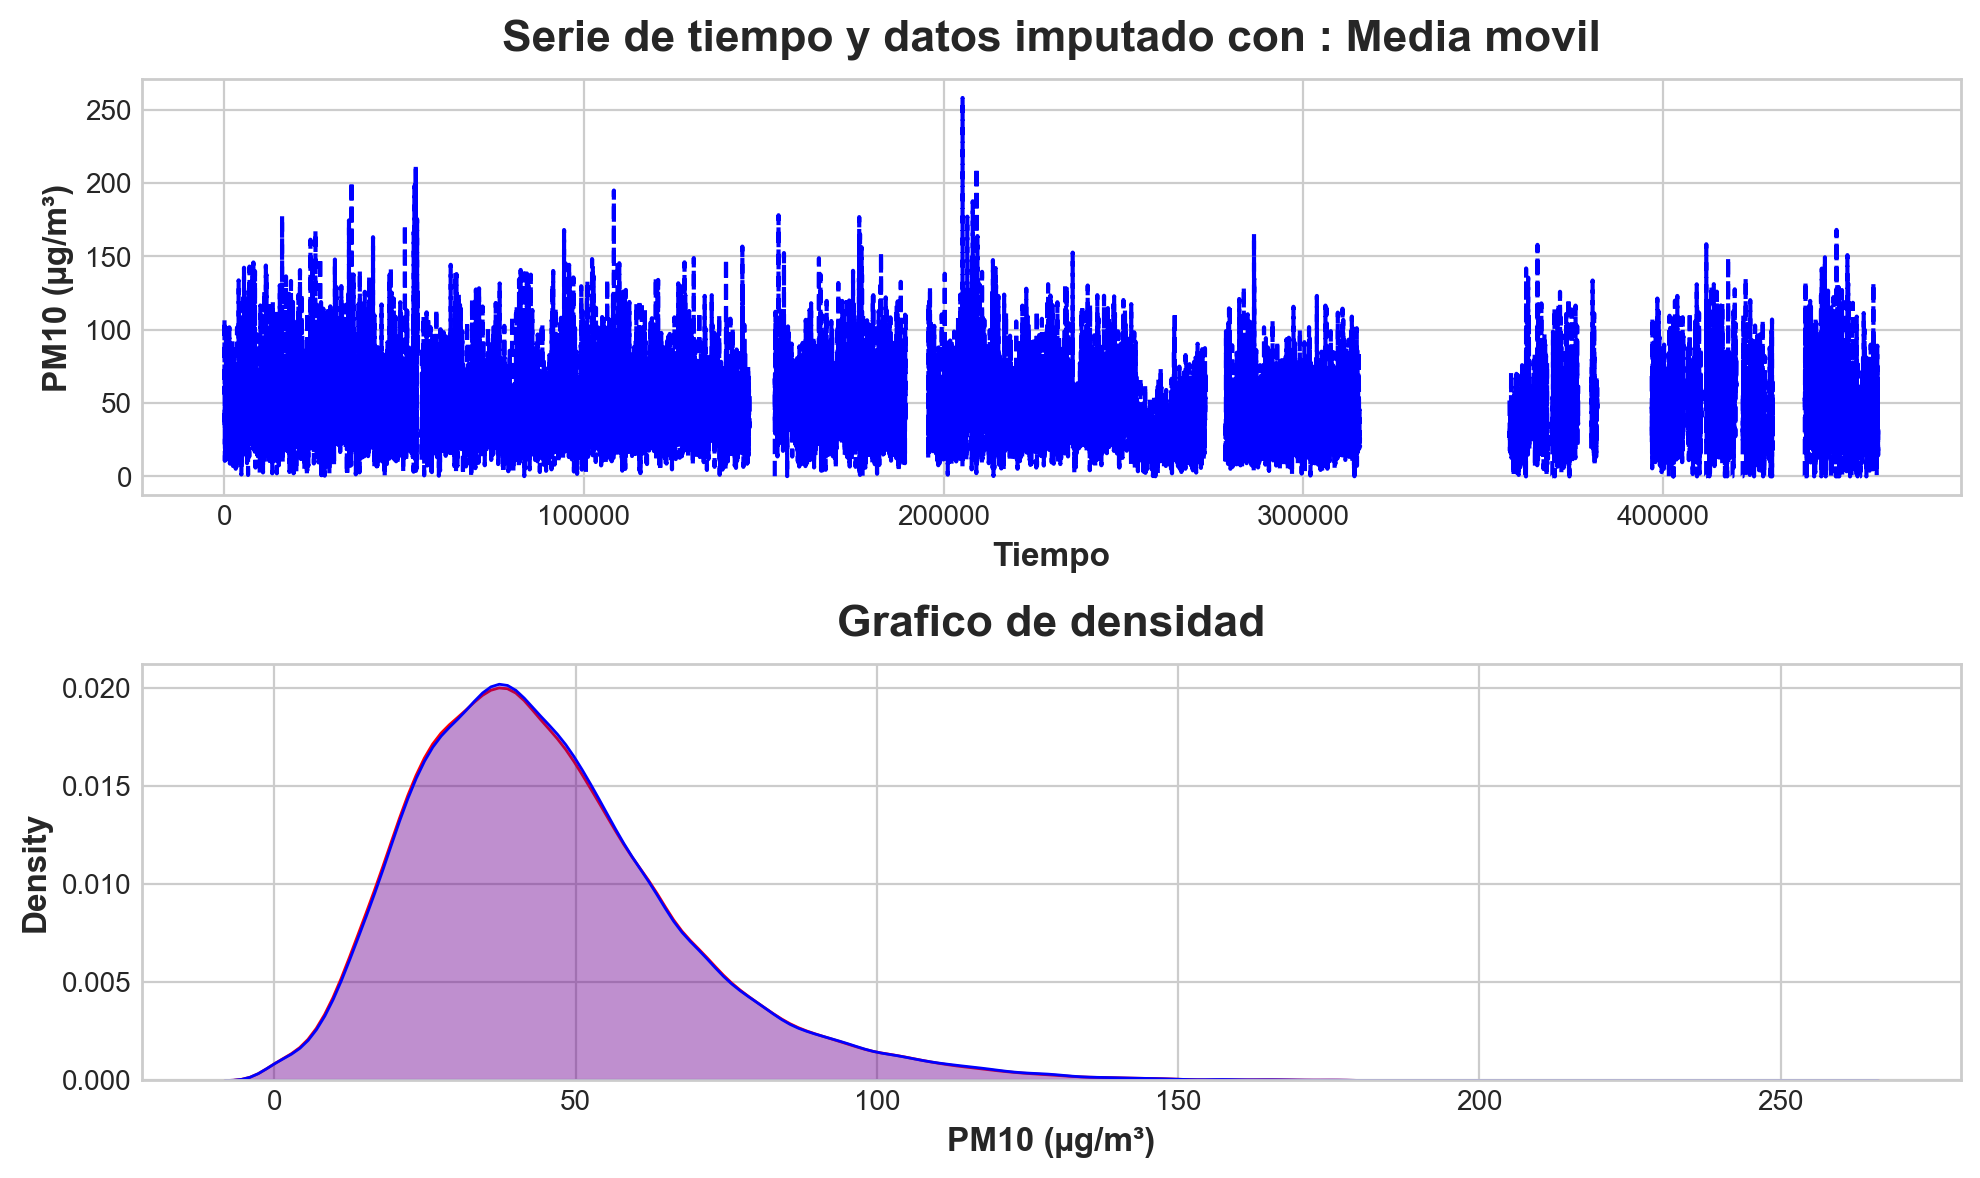

In [73]:
ermita['pm10_moving_average']=ermita.loc[:, ['pm10']].assign(RollingMean=ermita['pm10'].fillna(ermita['pm10'].rolling(24,min_periods=1,).mean()))['RollingMean']
plot_impute('pm10_moving_average', "Media movil")

In [74]:
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(ermita["pm10"].dropna(), ermita["pm10_moving_average"].dropna())
print(f" Mann.Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Mann.Whitney U Test: statistic=786304511.5000, p-value=0.3578


Se logra ver en el grafico de la serie de tiempo que la imputación por media movil no fue efectiva en el periodo comprendido entre finales del 2020 y mediados del 2021, ya que que no hay datos que promediar en esa ventana de tiempo. Esto genera la ilusión de que la distribución resultante tiene un buen ajuste a la distribución de *pm10*, pero en realidad aún hay una gran presencia de datos faltantes en la variable, por lo que este método no es efectivo.

### Imputación con Kalman

Este método utiliza un modelo de estado espacial para estimar los valores faltantes de manera dinámica

In [75]:
# prepare input values for R 
this_value = np.ndarray.tolist(ermita['pm10'].values)
this_value = robjects.FloatVector(this_value)

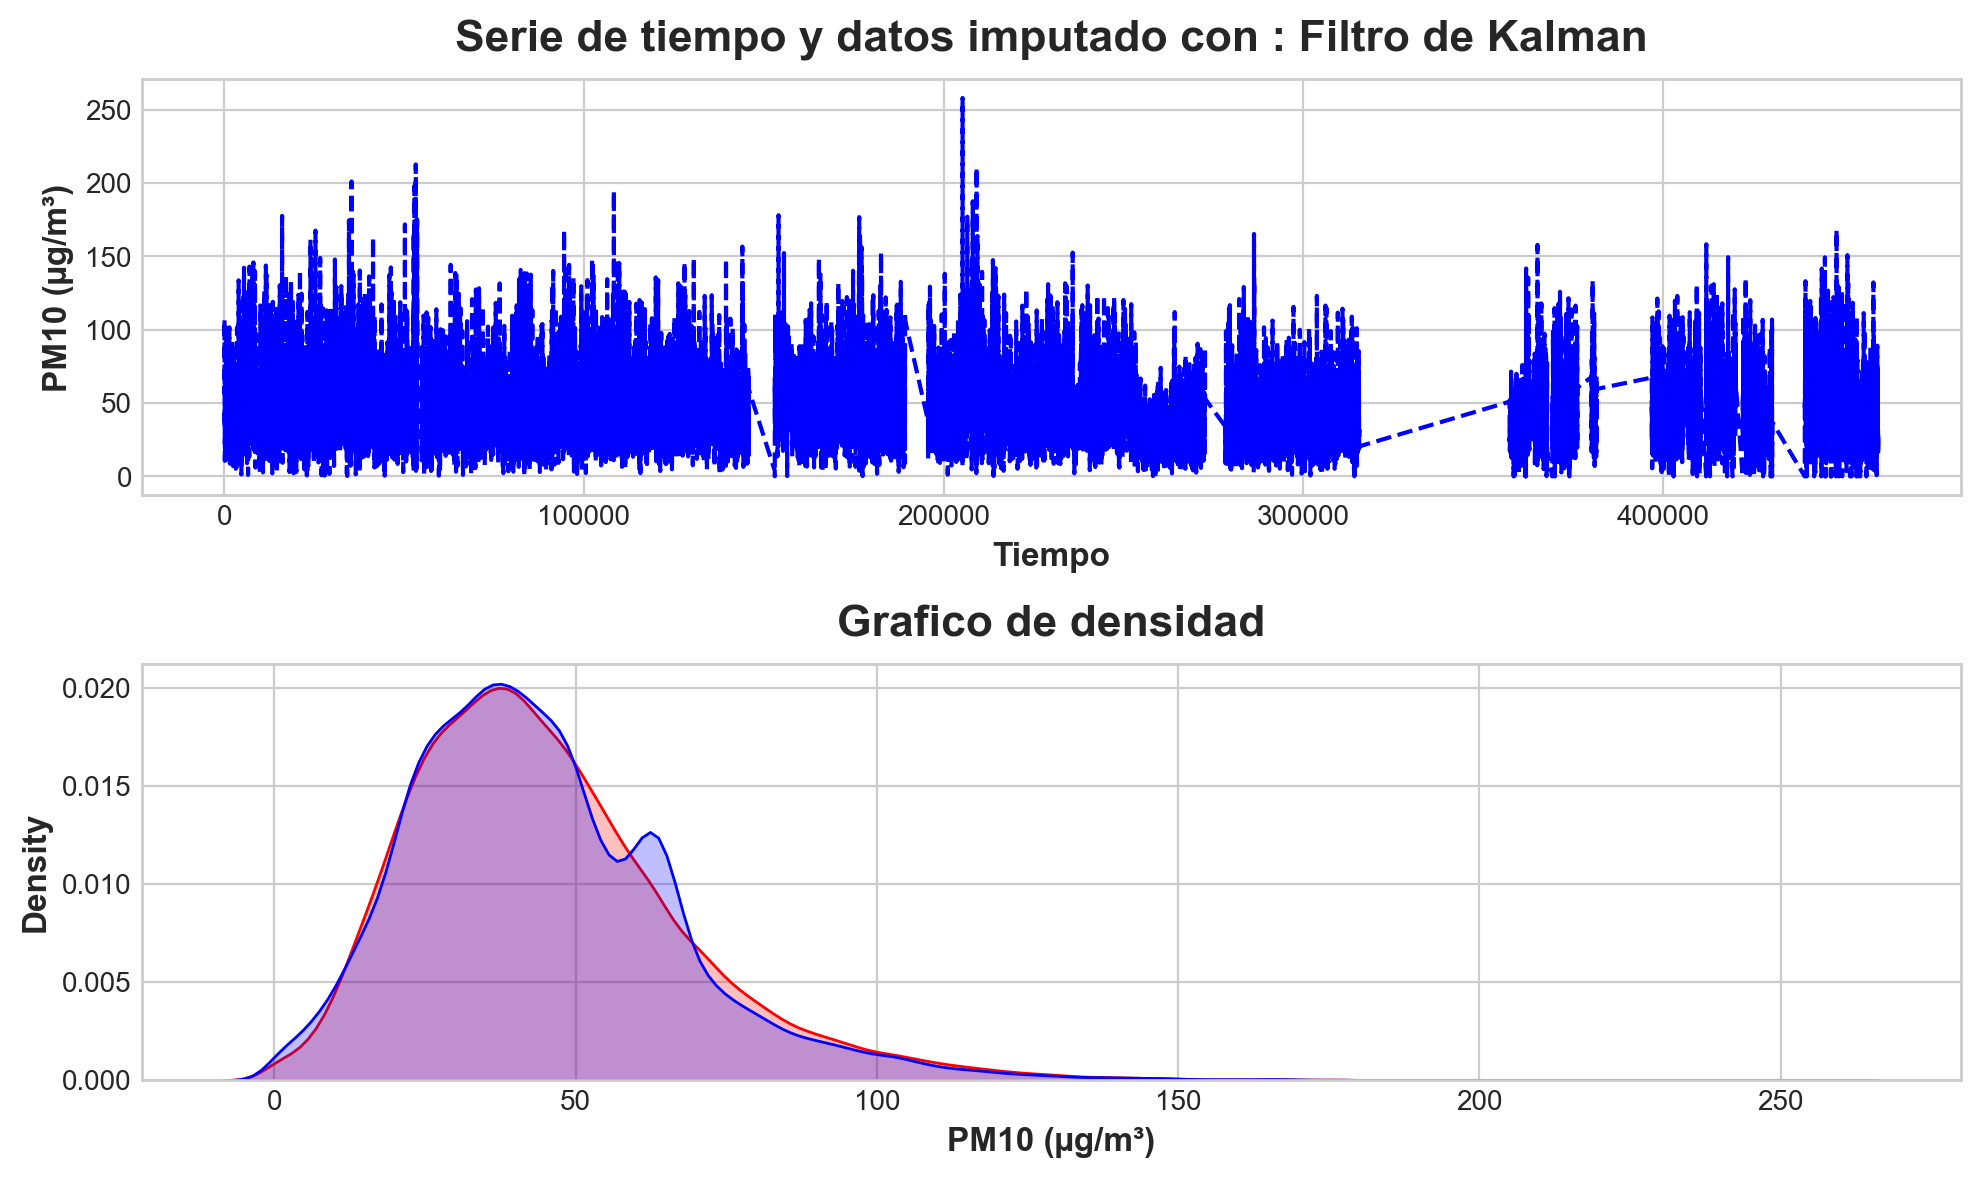

In [76]:
ermita['pm10_kalman'] = kalman_StructTs(this_value, model = "StructTS")
plot_impute('pm10_kalman', "Filtro de Kalman")

In [77]:
stat, p_value = mannwhitneyu(ermita["pm10"].dropna(), ermita["pm10_kalman"])
print(f" Mann.Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Mann.Whitney U Test: statistic=1011543580.0000, p-value=0.0028


Los resultados obtenidos al implementar la imputación con el filtro de Kalman su similares a los de la interpolación lineal, donde se logra ver en el grafico de la serie de tiempo los datos imputados como segemntos lineales  para los periodos de tiempo donde habian gran cantidad de datos faltantes. El grafico de densidad muestra que la distribución para el *pm10* es aproximadamente similar a la distribución original del *pm10*, ya que hay una gran concentración de los datos hacia valores inferiores de 50 µg/m3, pero se forma una nueva concentración de datos alrededor de los 60-70 µg/m3, que no hace parte de la distribución real, que puede afectar el ajuste de los modelo.

### Imputación con Kalman-ARIMA

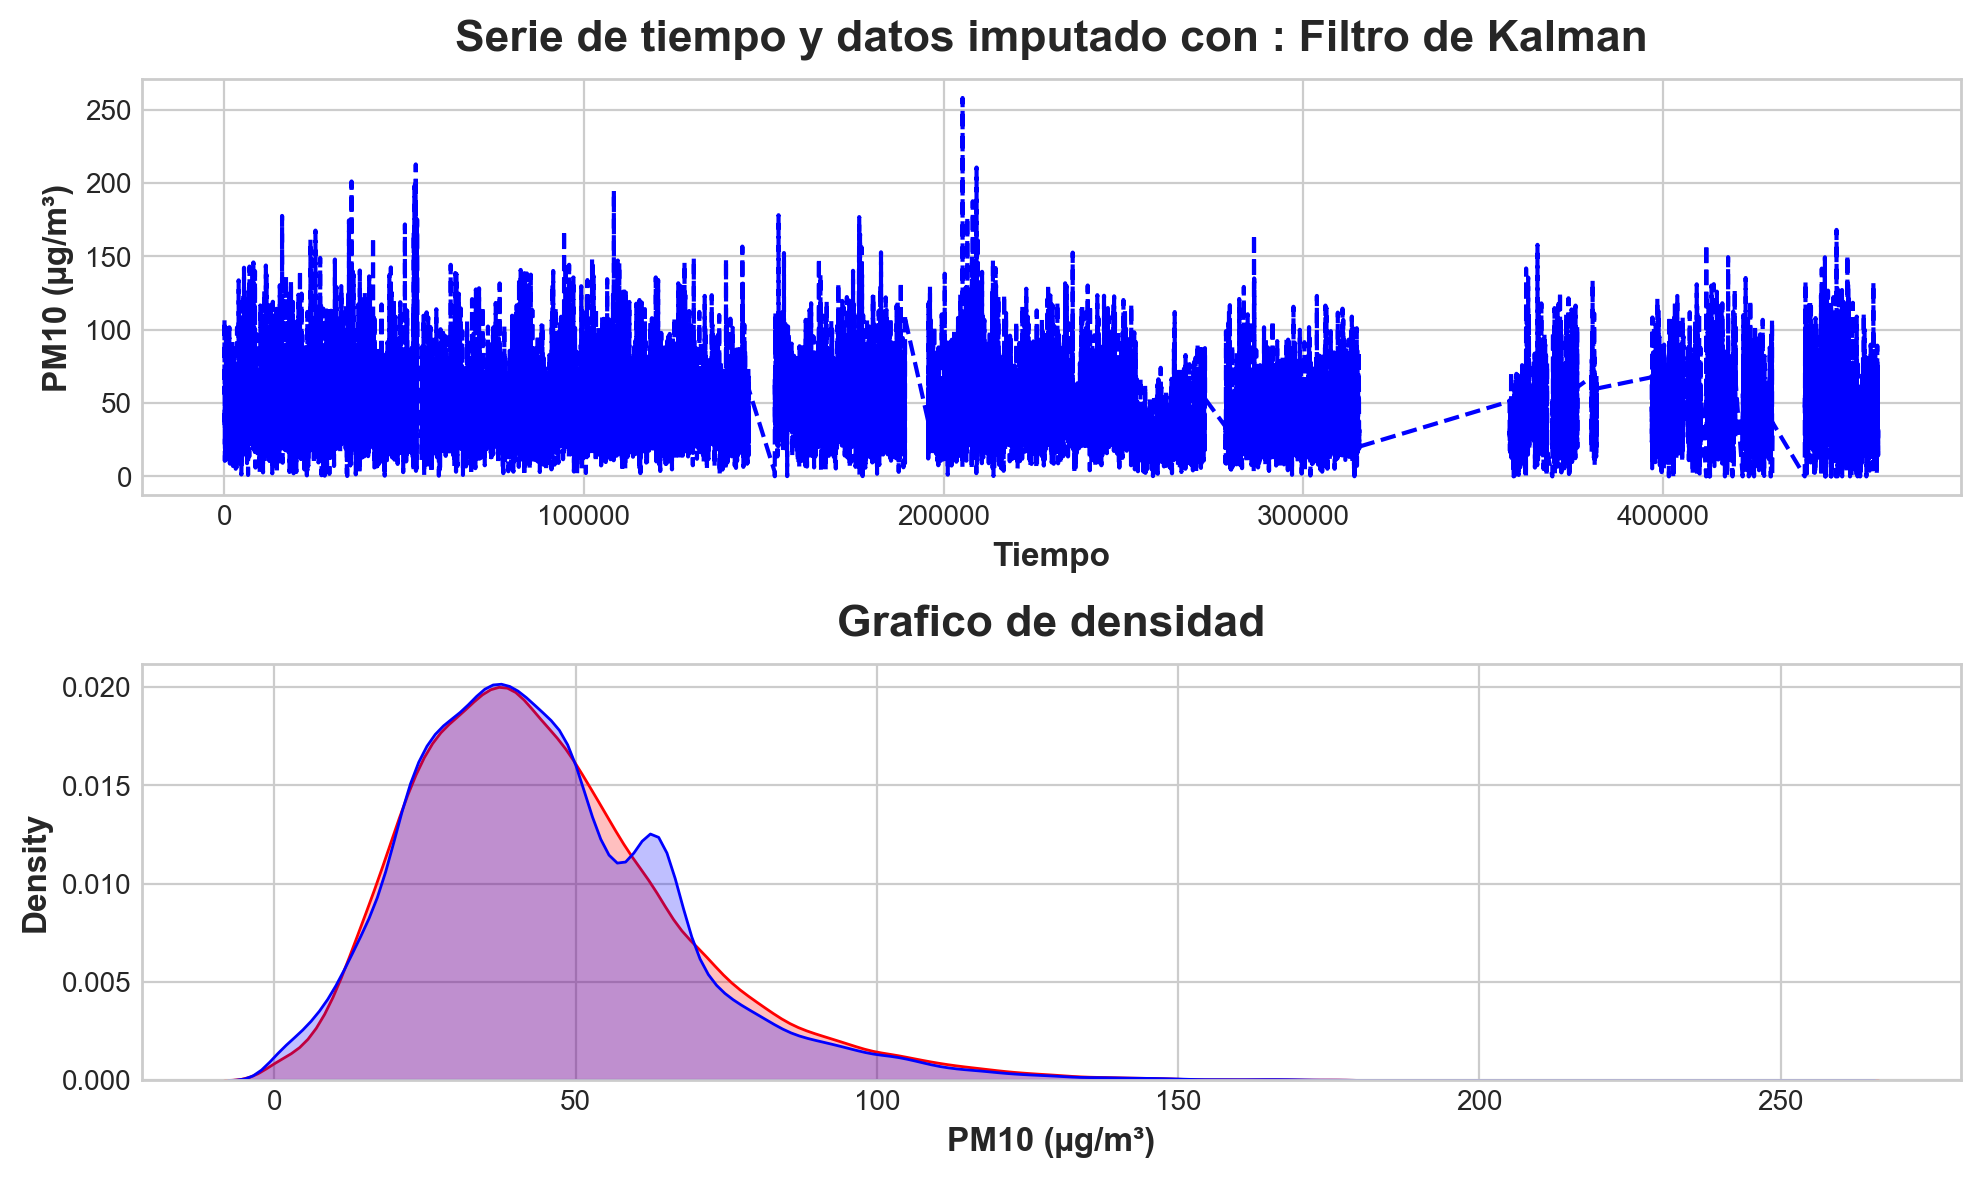

In [78]:
ermita['pm10_arima']  = kalman_StructTs(this_value, model = "auto.arima")
plot_impute('pm10_arima', "Filtro de Kalman")

In [79]:
stat, p_value = mannwhitneyu(ermita["pm10"].dropna(), ermita["pm10_arima"])
print(f" Mann.Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Mann.Whitney U Test: statistic=1011273873.0000, p-value=0.0035


Los resultados obtenidos al implementar la imputación con ARIMA su similares a los de la interpolación lineal, donde se logra ver en el grafico de la serie de tiempo los datos imputados como segemntos lineales  para los periodos de tiempo donde habian gran cantidad de datos faltantes. El grafico de densidad muestra que la distribución para el *pm10* es aproximadamente similar a la distribución original del *pm10*, ya que hay una gran concentración de los datos hacia valores inferiores de 50 µg/m3, pero se forma una nueva concentración de datos alrededor de los 60-70 µg/m3, que no hace parte de la distribución real, que puede afectar el ajuste de los modelo.

In [80]:
# ermita.to_csv("datos_imputados.csv")
# test_data.to_csv("test_data.csv")

Aunque los resultados de la imputación de datos faltantes no arrojaron una distribución indistinguible de la original para el *pm10*, para propositos de este trabajo se tomará la serie de tiempo que resulta al utilizar ARIMA para la imputación de datos.

## Descomposición

Se descompone la serie en sus 3 componentes: tendencia, estacionalidad y componente aleatorio. 

Al tener muchos puntos no se logra apreciar el comportamiento de la serie de tiempo.

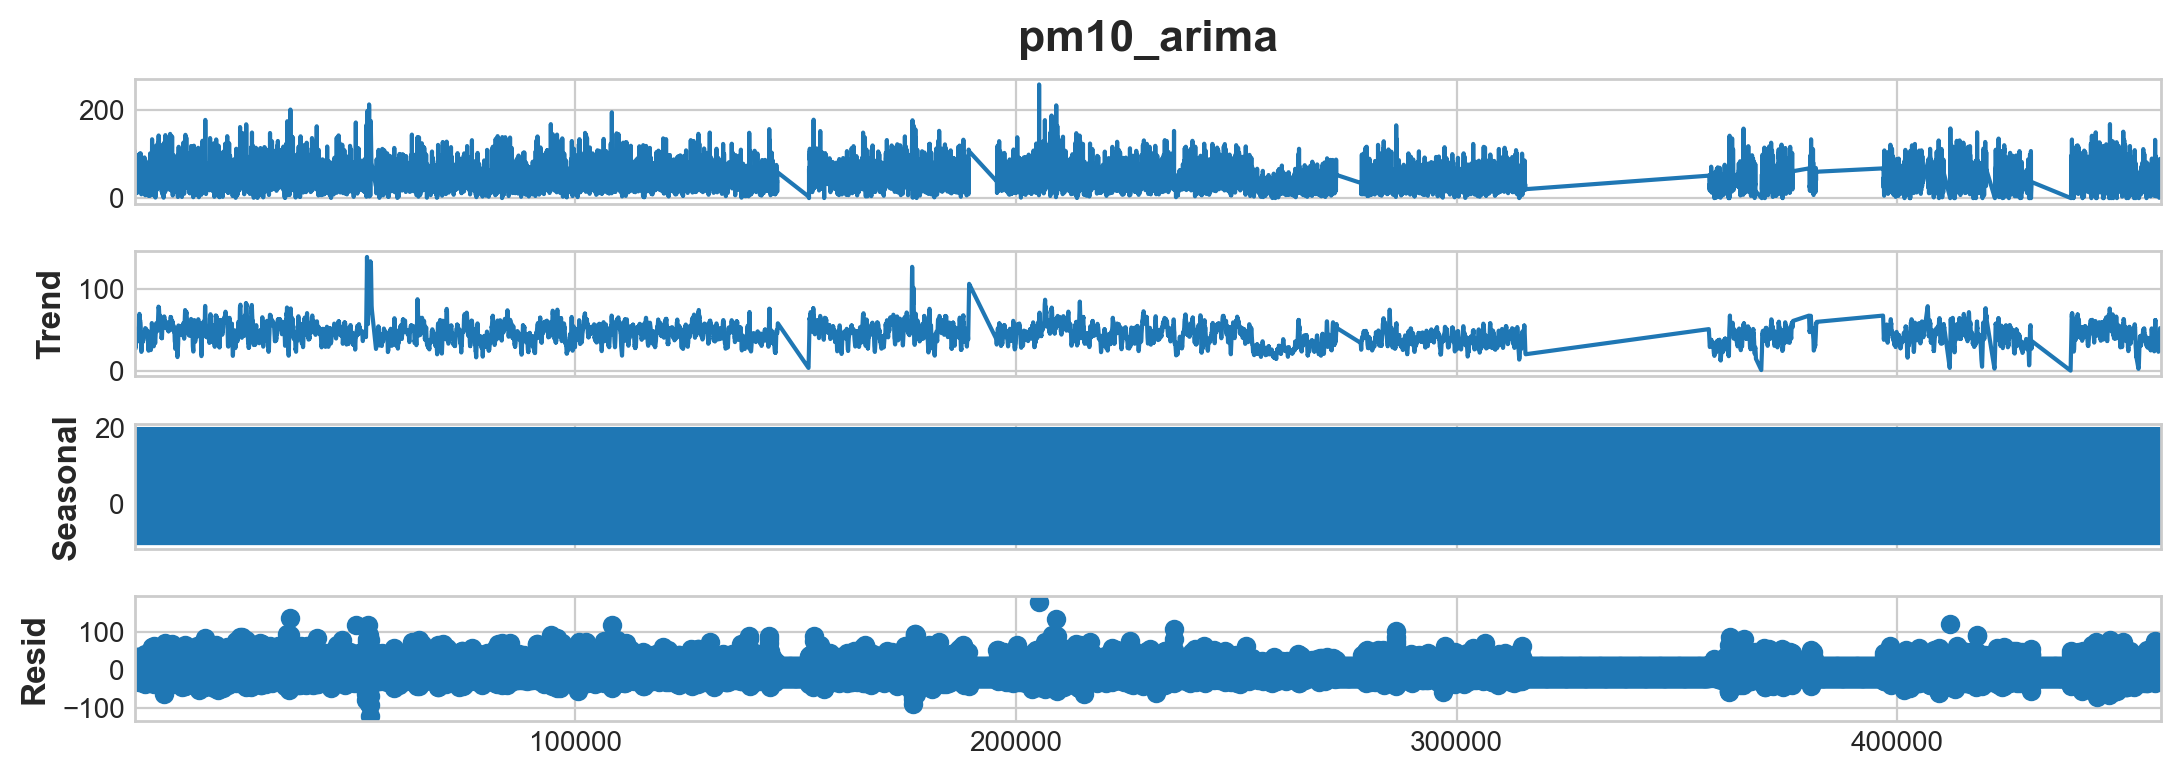

In [81]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(ermita.pm10_arima, period=24)
fig = decomposition.plot()
plt.show()

Para tener una mejor visual del comportamiento de la serie horaria de *pm10* se toma observan los registros para el último mes: 

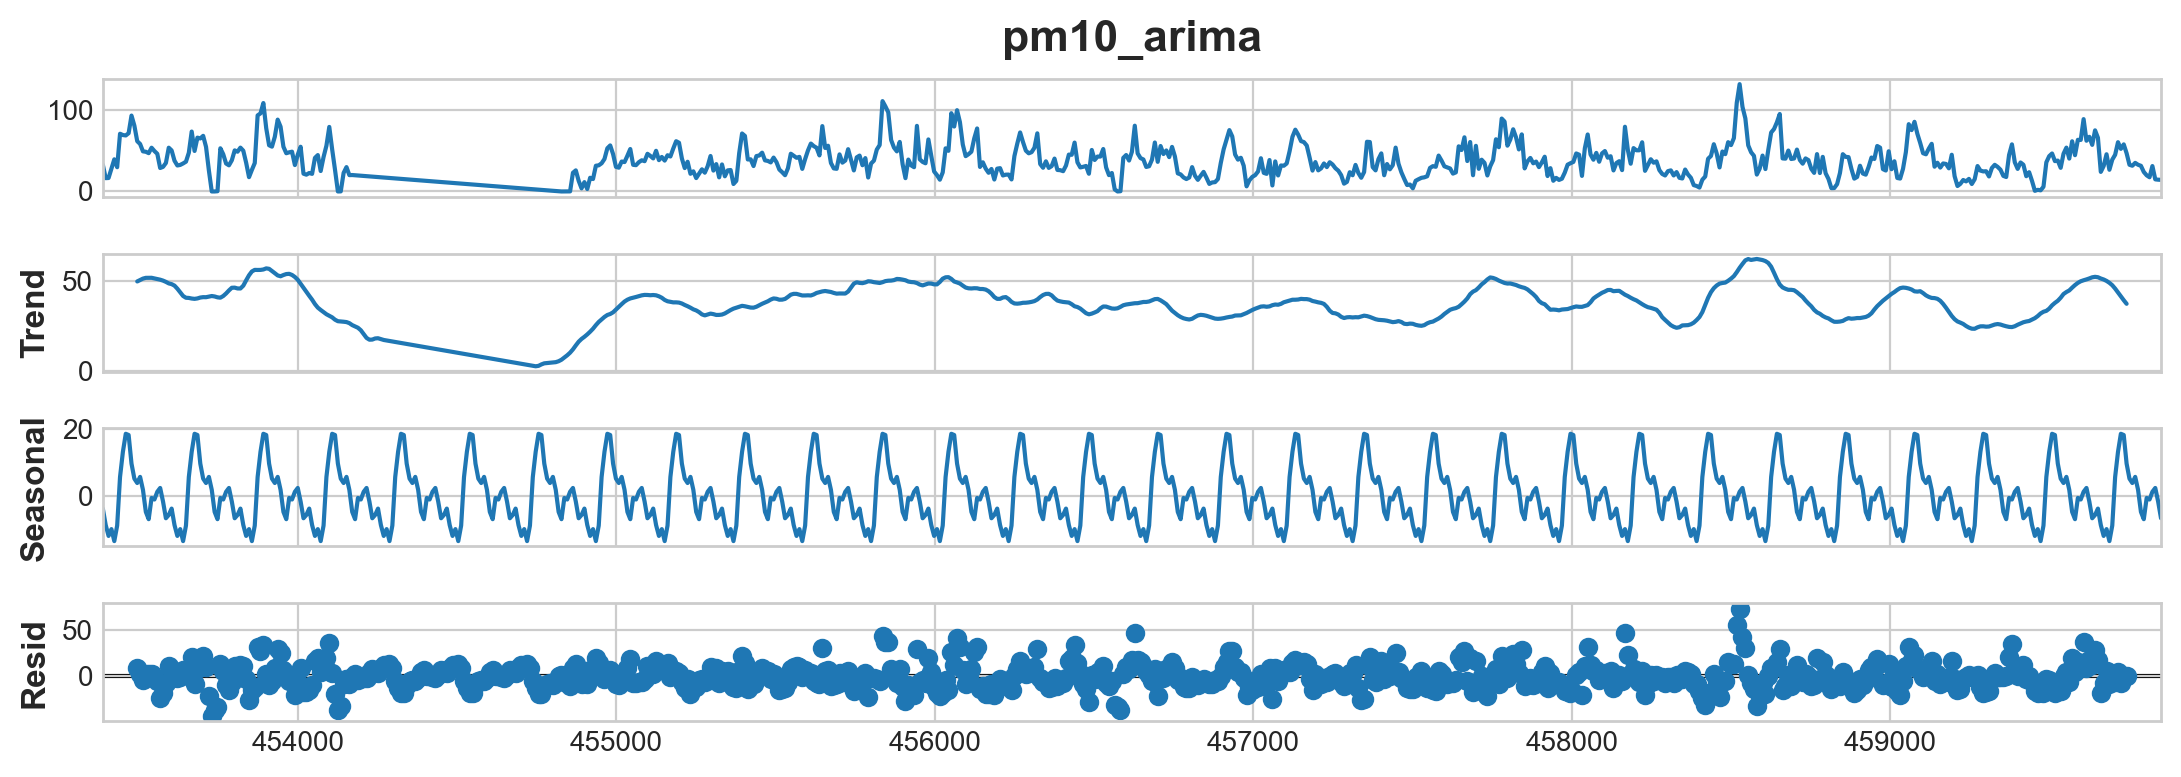

In [89]:
decomposition = sm.tsa.seasonal_decompose(ermita.pm10_arima[-720:-1], period=24)
fig = decomposition.plot()

No se logra detectar una tendencia a la alza o a la baja en la serie de tiempo. Parece que hay un componente estacional muy marcado, con patrón que incluye picos (probablemente horas de la mañana) y valles (horas de la tardes) constantes. 

## Procesos estacionarios

Para poder ajustar algunos modelos a la serie de tiempo, se requiere que la serie sea estacionaria. A simple vista, no se logra apreciar si la serie es estacionaria, para confirmarlo se hará uso del test de Dicky Fuller.

In [39]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(ermita.pm10_arima)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -15.315794
p-value: 0.000000


La prueba de Dickey-Fuller tiene como hipotesis nula:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>H</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>0</mn>
    </mrow>
  </msub>
  <mo>:</mo>
  <mtext>la serie de tiempo es no estacionaria</mtext>
  <mo>.</mo>
</math>

Tomando un nivel de significancia de 0.05, al compararlo con el p-valor obtenido en la prueba (~0), se rechaza la hipotesis nula, por lo que no se tiene suficiente evuidencia estadistica para afirmar que la serie no es estacionaria.

## Autocorrelación

Ahora se realiza un analisis de autocorrelación para la serie de tiempo del *pm10*. 

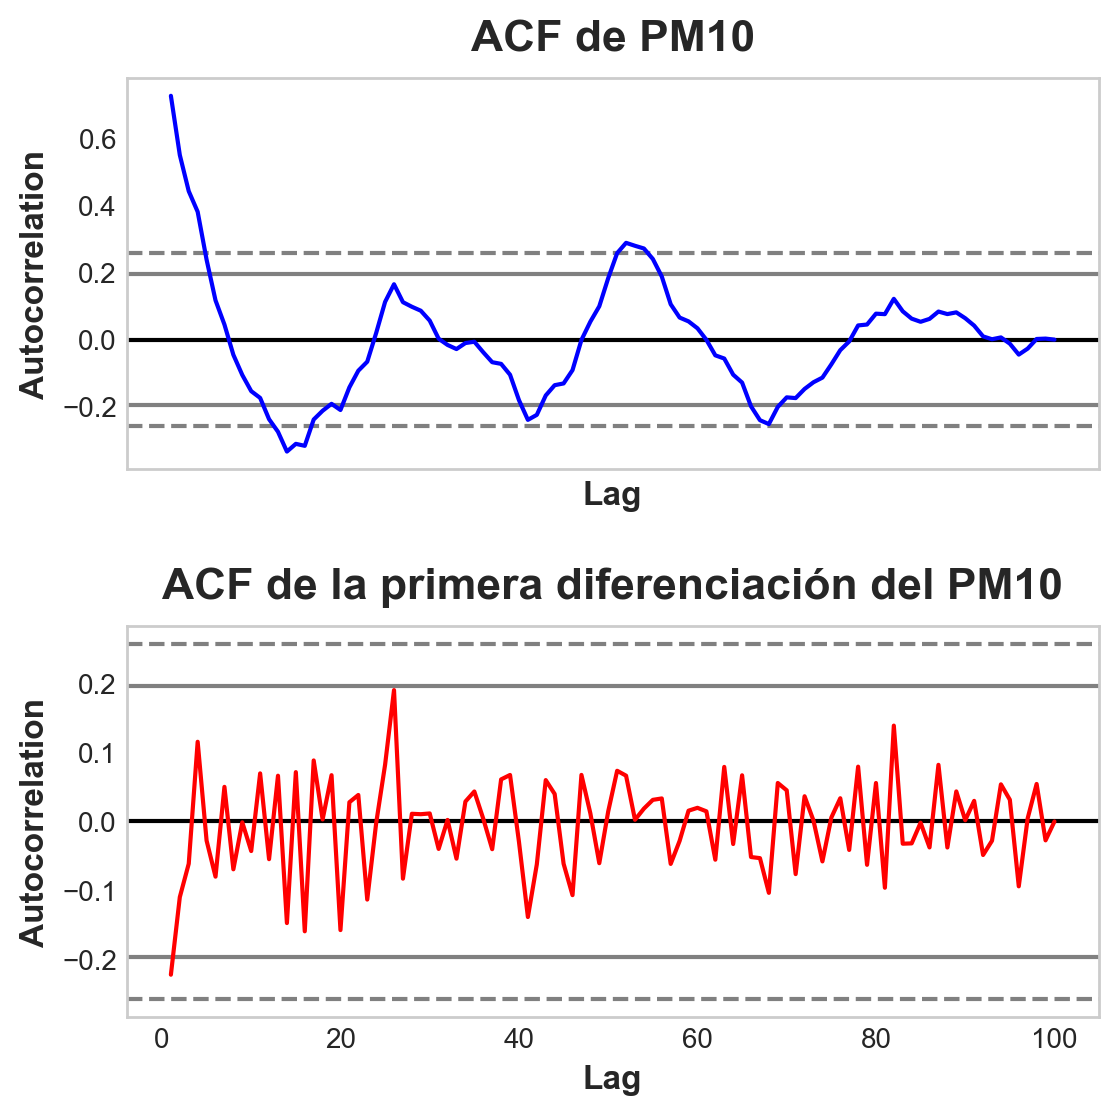

In [99]:
from pandas.plotting import autocorrelation_plot

first_order_diff = ermita.pm10_arima.diff(1)
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(ermita.pm10_arima[:100], color='b', ax=ax[0])
ax[0].set_title('ACF de PM10')
autocorrelation_plot(first_order_diff.iloc[1:][:100], color='r', ax=ax[1])
ax[1].set_title('ACF de la primera diferenciación del PM10')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

Al observar el grafico para la autocorrelación de la serie original, se puede ver que existen rezagos con autocorrelación significativa, y existe un patrón recurrente. Al momento de hacer la primera diferenciación, los rezagos no muestran ningún patrón predecible.

Se realiza la prueba de Ljung-Box para los rezagos, cuya hipotesis nula establece que: 


<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>H</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>0</mn>
    </mrow>
  </msub>
  <mo>:</mo>
  <mtext>Los datos se distribuyen de forma independiente (correlación == 0)</mtext>
  <mo>.</mo>
</math>


In [100]:
from statsmodels.tsa import stattools
from pandas.plotting import autocorrelation_plot
acf_djia, confint_djia, qstat_djia, pvalues_djia = stattools.acf(ermita.pm10_arima,
                                                                 nlags=24,
                                                                 qstat=True,
                                                                 alpha=0.05)

In [102]:
alpha = 0.05
for l, p_val in enumerate(pvalues_djia):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = 0.0
Null hypothesis is rejected at lag = 1 for p-val = 0.0
Null hypothesis is rejected at lag = 2 for p-val = 0.0
Null hypothesis is rejected at lag = 3 for p-val = 0.0
Null hypothesis is rejected at lag = 4 for p-val = 0.0
Null hypothesis is rejected at lag = 5 for p-val = 0.0
Null hypothesis is rejected at lag = 6 for p-val = 0.0
Null hypothesis is rejected at lag = 7 for p-val = 0.0
Null hypothesis is rejected at lag = 8 for p-val = 0.0
Null hypothesis is rejected at lag = 9 for p-val = 0.0
Null hypothesis is rejected at lag = 10 for p-val = 0.0
Null hypothesis is rejected at lag = 11 for p-val = 0.0
Null hypothesis is rejected at lag = 12 for p-val = 0.0
Null hypothesis is rejected at lag = 13 for p-val = 0.0
Null hypothesis is rejected at lag = 14 for p-val = 0.0
Null hypothesis is rejected at lag = 15 for p-val = 0.0
Null hypothesis is rejected at lag = 16 for p-val = 0.0
Null hypothesis is rejected at lag = 17 for p-val = 0.0
Nu

Con un nivel de confianza de 0.05, se observa que para los primeros 24 rezagos se rechaza la hipotesis nula, lo que indica que no se tiene suficiente evidencia para afirmar que los rezagos tienen correlación 0. 

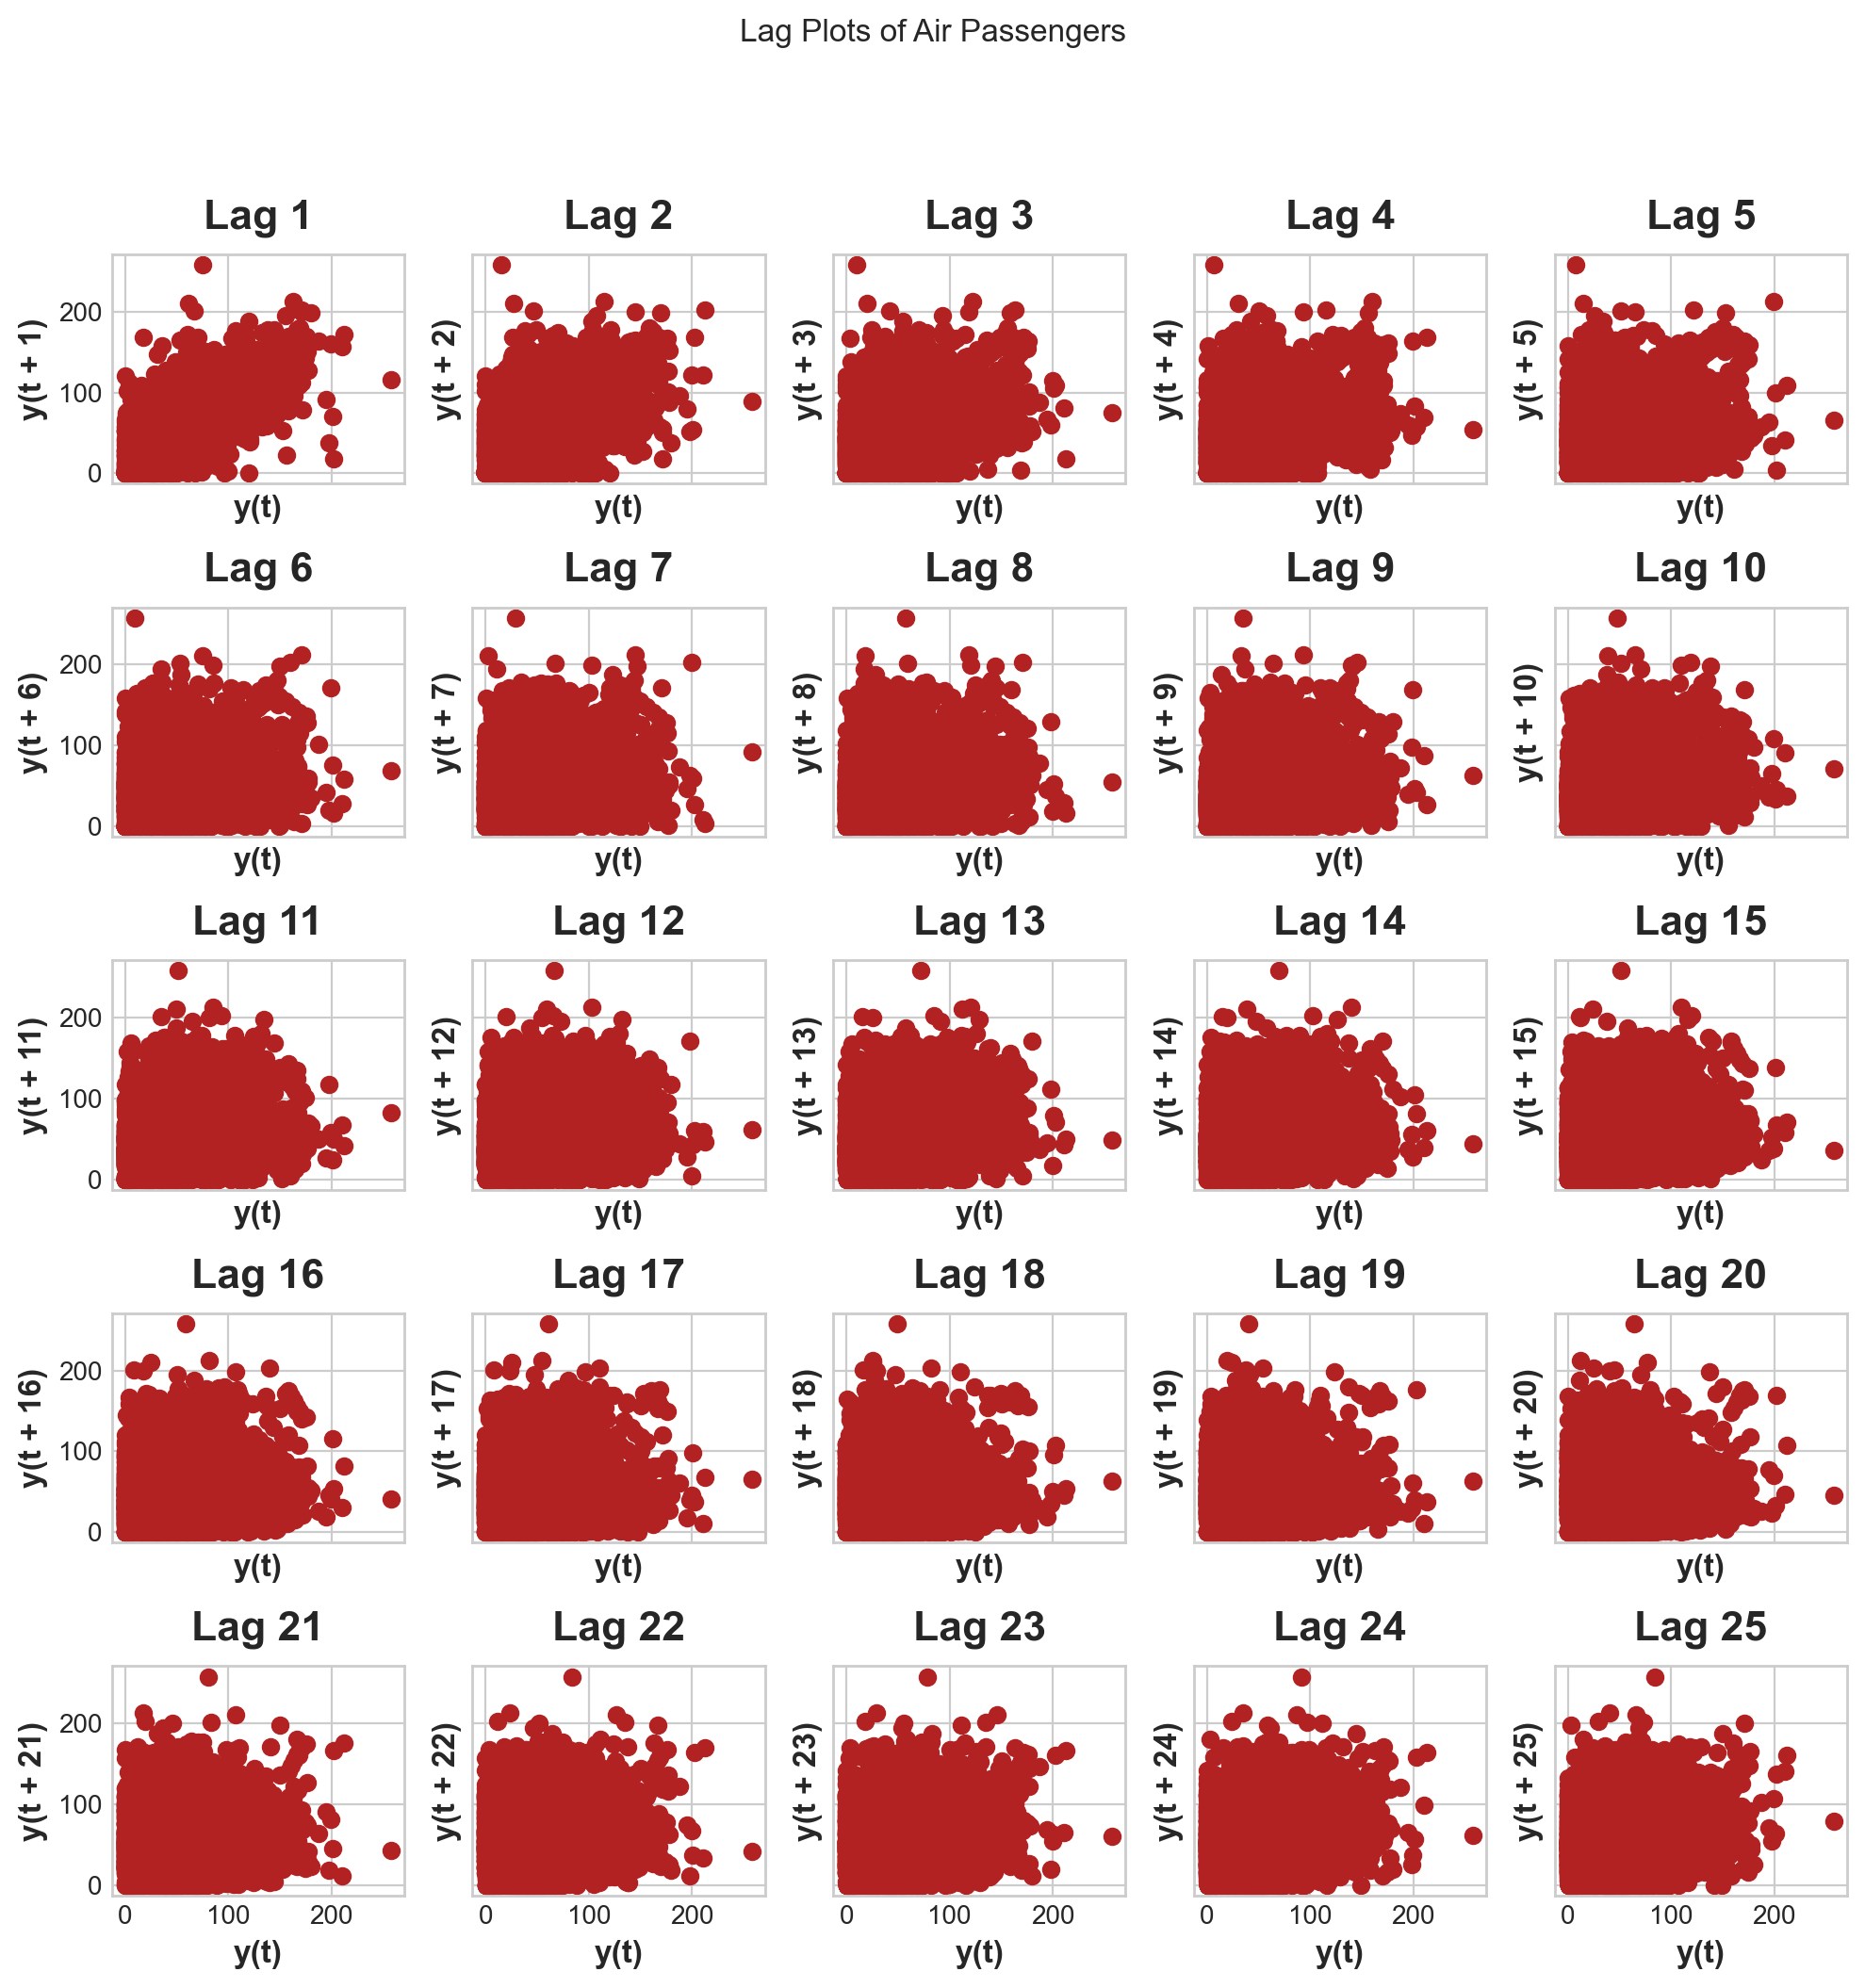

In [103]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(5, 5, figsize=(10,10), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:25]):
    lag_plot(ermita['pm10_arima'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)    
plt.show()

No se logra apreciar un patrón en los gráficos de los rezagos, a excepción del rezago 1, que tiene una tendencia lineal, lo que puede indicar que este rezago si tiene una autocorrelación significativa. 